# Project 2-1

Jianying Zhu


May 10, 2021

## 1. Retail Data & Analytics

### Problems Statement:

1. **Retail Data Analytics** - Regression:
   Figure out important factors in all varaiables and predict the department-wide sales for the following year

In [1]:
import numpy as np
import pandas as pd
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pylab as plt
#import plotly.offline as py
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
from prettytable import PrettyTable
from tabulate import tabulate

from time import perf_counter

from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, scale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import ShuffleSplit
from sklearn.decomposition import PCA

from dmba import classificationSummary, gainsChart
from dmba import regressionSummary, exhaustive_search
from dmba import adjusted_r2_score, AIC_score, BIC_score

from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report

In [2]:
for dirname, _, filenames in os.walk('C:\\Users\\14830\\Downloads\\retail'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\14830\Downloads\retail\features dataset.csv
C:\Users\14830\Downloads\retail\sales dataset.csv
C:\Users\14830\Downloads\retail\stores dataset.csv


In [3]:
stores = pd.read_csv('.\\retail\\stores dataset.csv')
display(stores)

Store Type    Size
0       1    A  151315
1       2    A  202307
2       3    B   37392
3       4    A  205863
4       5    B   34875
5       6    A  202505
6       7    B   70713
7       8    A  155078
8       9    B  125833
9      10    B  126512
10     11    A  207499
11     12    B  112238
12     13    A  219622
13     14    A  200898
14     15    B  123737
15     16    B   57197
16     17    B   93188
17     18    B  120653
18     19    A  203819
19     20    A  203742
20     21    B  140167
21     22    B  119557
22     23    B  114533
23     24    A  203819
24     25    B  128107
25     26    A  152513
26     27    A  204184
27     28    A  206302
28     29    B   93638
29     30    C   42988
30     31    A  203750
31     32    A  203007
32     33    A   39690
33     34    A  158114
34     35    B  103681
35     36    A   39910
36     37    C   39910
37     38    C   39690
38     39    A  184109
39     40    A  155083
40     41    A  196321
41     42    C   39690
42     43    C   41062
43     44    C   39910
44     45    B  118221

In [4]:
features = pd.read_csv('.\\retail\\Features dataset.csv', parse_dates=["Date"])
display(features)

Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1 2010-05-02        42.31       2.572        NaN        NaN   
1         1 2010-12-02        38.51       2.548        NaN        NaN   
2         1 2010-02-19        39.93       2.514        NaN        NaN   
3         1 2010-02-26        46.63       2.561        NaN        NaN   
4         1 2010-05-03        46.50       2.625        NaN        NaN   
...     ...        ...          ...         ...        ...        ...   
8185     45 2013-06-28        76.05       3.639    4842.29     975.03   
8186     45 2013-05-07        77.50       3.614    9090.48    2268.58   
8187     45 2013-12-07        79.37       3.614    3789.94    1827.31   
8188     45 2013-07-19        82.84       3.737    2961.49    1047.07   
8189     45 2013-07-26        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0           NaN        NaN        NaN  211.096358         8.106      False  
1           NaN        NaN        NaN  211.242170         8.106       True  
2           NaN        NaN        NaN  211.289143         8.106      False  
3           NaN        NaN        NaN  211.319643         8.106      False  
4           NaN        NaN        NaN  211.350143         8.106      False  
...         ...        ...        ...         ...           ...        ...  
8185       3.00    2449.97    3169.69         NaN           NaN      False  
8186     582.74    5797.47    1514.93         NaN           NaN      False  
8187      85.72     744.84    2150.36         NaN           NaN      False  
8188     204.19     363.00    1059.46         NaN           NaN      False  
8189       2.06      10.88    1864.57         NaN           NaN      False  

[8190 rows x 12 columns]

In [5]:
sales = pd.read_csv('.\\retail\\sales dataset.csv', parse_dates=["Date"])
display(sales)

Store  Dept       Date  Weekly_Sales  IsHoliday
0           1     1 2010-05-02      24924.50      False
1           1     1 2010-12-02      46039.49       True
2           1     1 2010-02-19      41595.55      False
3           1     1 2010-02-26      19403.54      False
4           1     1 2010-05-03      21827.90      False
...       ...   ...        ...           ...        ...
421565     45    98 2012-09-28        508.37      False
421566     45    98 2012-05-10        628.10      False
421567     45    98 2012-12-10       1061.02      False
421568     45    98 2012-10-19        760.01      False
421569     45    98 2012-10-26       1076.80      False

[421570 rows x 5 columns]

In [6]:
features['Date'] = pd.to_datetime(features['Date'])
features['Date']

0      2010-05-02
1      2010-12-02
2      2010-02-19
3      2010-02-26
4      2010-05-03
          ...    
8185   2013-06-28
8186   2013-05-07
8187   2013-12-07
8188   2013-07-19
8189   2013-07-26
Name: Date, Length: 8190, dtype: datetime64[ns]

In [7]:
sales['Date'] = pd.to_datetime(sales['Date'])
sales['Date']

0        2010-05-02
1        2010-12-02
2        2010-02-19
3        2010-02-26
4        2010-05-03
            ...    
421565   2012-09-28
421566   2012-05-10
421567   2012-12-10
421568   2012-10-19
421569   2012-10-26
Name: Date, Length: 421570, dtype: datetime64[ns]

In [8]:
pt = PrettyTable(['data', 'dimension'])
pt.add_row(['stores', stores.shape])
pt.add_row(['features', features.shape])
pt.add_row(['sales', sales.shape])

print(pt,'\n')

+----------+-------------+
|   data   |  dimension  |
+----------+-------------+
|  stores  |   (45, 3)   |
| features |  (8190, 12) |
|  sales   | (421570, 5) |
+----------+-------------+ 



## Data preparation

In [9]:
#merge 3 tables
retails = pd.merge(sales,features, on=['Store','Date', 'IsHoliday'], how='left')
retails = pd.merge(retails,stores, on=['Store'], how='left')
display(retails)

#retails = sales.merge(stores).merge(features)
#display(retails)

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  \
0           1     1 2010-05-02      24924.50      False        42.31   
1           1     1 2010-12-02      46039.49       True        38.51   
2           1     1 2010-02-19      41595.55      False        39.93   
3           1     1 2010-02-26      19403.54      False        46.63   
4           1     1 2010-05-03      21827.90      False        46.50   
...       ...   ...        ...           ...        ...          ...   
421565     45    98 2012-09-28        508.37      False        64.88   
421566     45    98 2012-05-10        628.10      False        64.89   
421567     45    98 2012-12-10       1061.02      False        54.47   
421568     45    98 2012-10-19        760.01      False        56.47   
421569     45    98 2012-10-26       1076.80      False        58.85   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0            2.572        NaN        NaN        NaN        NaN        NaN   
1            2.548        NaN        NaN        NaN        NaN        NaN   
2            2.514        NaN        NaN        NaN        NaN        NaN   
3            2.561        NaN        NaN        NaN        NaN        NaN   
4            2.625        NaN        NaN        NaN        NaN        NaN   
...            ...        ...        ...        ...        ...        ...   
421565       3.997    4556.61      20.64       1.50    1601.01    3288.25   
421566       3.985    5046.74        NaN      18.82    2253.43    2340.01   
421567       4.000    1956.28        NaN       7.89     599.32    3990.54   
421568       3.969    2004.02        NaN       3.18     437.73    1537.49   
421569       3.882    4018.91      58.08     100.00     211.94     858.33   

               CPI  Unemployment Type    Size  
0       211.096358         8.106    A  151315  
1       211.242170         8.106    A  151315  
2       211.289143         8.106    A  151315  
3       211.319643         8.106    A  151315  
4       211.350143         8.106    A  151315  
...            ...           ...  ...     ...  
421565  192.013558         8.684    B  118221  
421566  192.170412         8.667    B  118221  
421567  192.327265         8.667    B  118221  
421568  192.330854         8.667    B  118221  
421569  192.308899         8.667    B  118221  

[421570 rows x 16 columns]

In [10]:
retails.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
dtype: object

In [11]:
retails.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

In [12]:
dataframe = [('Store','Integer', 'Number of stores which observation in recorded 1-45'), 
             ('Dept','Integer', 'Number of departments ranging from 1-99'),
             ('Date',  'Datatime', 'Time of the week where this observation was taken'),
             ('Weekly Sales', 'Integer', 'Sales for the given department in the given store($)'),
             ('Is Holiday', 'Boolean', 'Whether the week is a special holiday week(True, False)'),
             ('Temperature', 'Numeric', 'Average temperature of the region during that week(°F)'),
             ('Fuel Price', 'Numeric', 'Costs of fuel in the region($)'),
             ('MarkDown1-5',  'Numeric', 'Types of markdowns and quantities available during that week. Only available after Nov 2011, \
                                          but not available for all stores all the time'),
             ('CPI', 'Numeric', 'Consumer Price Index'),
             ('Unemployment','Numeric', 'Unemployment rate'),
            ('Type', 'Object', '3 types(A, B, C)'),
            ('Size', 'Integer', 'Calculated by the numbers of products available in the particular store ranging from 34,000 to 210,000(sq. ft.)')]

table1 = pd.DataFrame(dataframe, columns=['Variable Name', 'Variable Type', 'Variable Description'])
table1.index += 1
#display the full text of rows
pd.set_option("display.max_colwidth", None)
#pd.set_option('display.max_rows', 100)
#pd.set_option('display.width', None) 
display(table1)

Variable Name Variable Type  \
1          Store       Integer   
2           Dept       Integer   
3           Date      Datatime   
4   Weekly Sales       Integer   
5     Is Holiday       Boolean   
6    Temperature       Numeric   
7     Fuel Price       Numeric   
8    MarkDown1-5       Numeric   
9            CPI       Numeric   
10  Unemployment       Numeric   
11          Type        Object   
12          Size       Integer   

                                                                                                                                                                    Variable Description  
1                                                                                                                                    Number of stores which observation in recorded 1-45  
2                                                                                                                                                Number of departments ranging from 1-99  
3                                                                                                                                      Time of the week where this observation was taken  
4                                                                                                                                   Sales for the given department in the given store($)  
5                                                                                                                                Whether the week is a special holiday week(True, False)  
6                                                                                                                                 Average temperature of the region during that week(°F)  
7                                                                                                                                                         Costs of fuel in the region($)  
8   Types of markdowns and quantities available during that week. Only available after Nov 2011,                                           but not available for all stores all the time  
9                                                                                                                                                                   Consumer Price Index  
10                                                                                                                                                                     Unemployment rate  
11                                                                                                                                                                      3 types(A, B, C)  
12                                                                       Calculated by the numbers of products available in the particular store ranging from 34,000 to 210,000(sq. ft.)

In [13]:
#check missing value
retails.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [14]:
# We can fill in NaN values with a mean
lst = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
for column in lst:
    retails[column].fillna((retails[column].mean()), inplace=True)

#non missing value
retails.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

### Data Distribution

In [15]:
retails1 = retails.copy()

In [16]:
retails1['Year'] = retails1['Date'].dt.year
retails1['Month'] = retails1['Date'].dt.month
retails1['Day'] = retails1['Date'].dt.dayofyear
retails1['Week'] = retails1['Date'].dt.weekofyear
display(retails1)

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  \
0           1     1 2010-05-02      24924.50      False        42.31   
1           1     1 2010-12-02      46039.49       True        38.51   
2           1     1 2010-02-19      41595.55      False        39.93   
3           1     1 2010-02-26      19403.54      False        46.63   
4           1     1 2010-05-03      21827.90      False        46.50   
...       ...   ...        ...           ...        ...          ...   
421565     45    98 2012-09-28        508.37      False        64.88   
421566     45    98 2012-05-10        628.10      False        64.89   
421567     45    98 2012-12-10       1061.02      False        54.47   
421568     45    98 2012-10-19        760.01      False        56.47   
421569     45    98 2012-10-26       1076.80      False        58.85   

        Fuel_Price    MarkDown1    MarkDown2    MarkDown3    MarkDown4  \
0            2.572  7246.420196  3334.628621  1439.421384  3383.168256   
1            2.548  7246.420196  3334.628621  1439.421384  3383.168256   
2            2.514  7246.420196  3334.628621  1439.421384  3383.168256   
3            2.561  7246.420196  3334.628621  1439.421384  3383.168256   
4            2.625  7246.420196  3334.628621  1439.421384  3383.168256   
...            ...          ...          ...          ...          ...   
421565       3.997  4556.610000    20.640000     1.500000  1601.010000   
421566       3.985  5046.740000  3334.628621    18.820000  2253.430000   
421567       4.000  1956.280000  3334.628621     7.890000   599.320000   
421568       3.969  2004.020000  3334.628621     3.180000   437.730000   
421569       3.882  4018.910000    58.080000   100.000000   211.940000   

          MarkDown5         CPI  Unemployment Type    Size  Year  Month  Day  \
0       4628.975079  211.096358         8.106    A  151315  2010      5  122   
1       4628.975079  211.242170         8.106    A  151315  2010     12  336   
2       4628.975079  211.289143         8.106    A  151315  2010      2   50   
3       4628.975079  211.319643         8.106    A  151315  2010      2   57   
4       4628.975079  211.350143         8.106    A  151315  2010      5  123   
...             ...         ...           ...  ...     ...   ...    ...  ...   
421565  3288.250000  192.013558         8.684    B  118221  2012      9  272   
421566  2340.010000  192.170412         8.667    B  118221  2012      5  131   
421567  3990.540000  192.327265         8.667    B  118221  2012     12  345   
421568  1537.490000  192.330854         8.667    B  118221  2012     10  293   
421569   858.330000  192.308899         8.667    B  118221  2012     10  300   

        Week  
0         17  
1         48  
2          7  
3          8  
4         18  
...      ...  
421565    39  
421566    19  
421567    50  
421568    42  
421569    43  

[421570 rows x 20 columns]

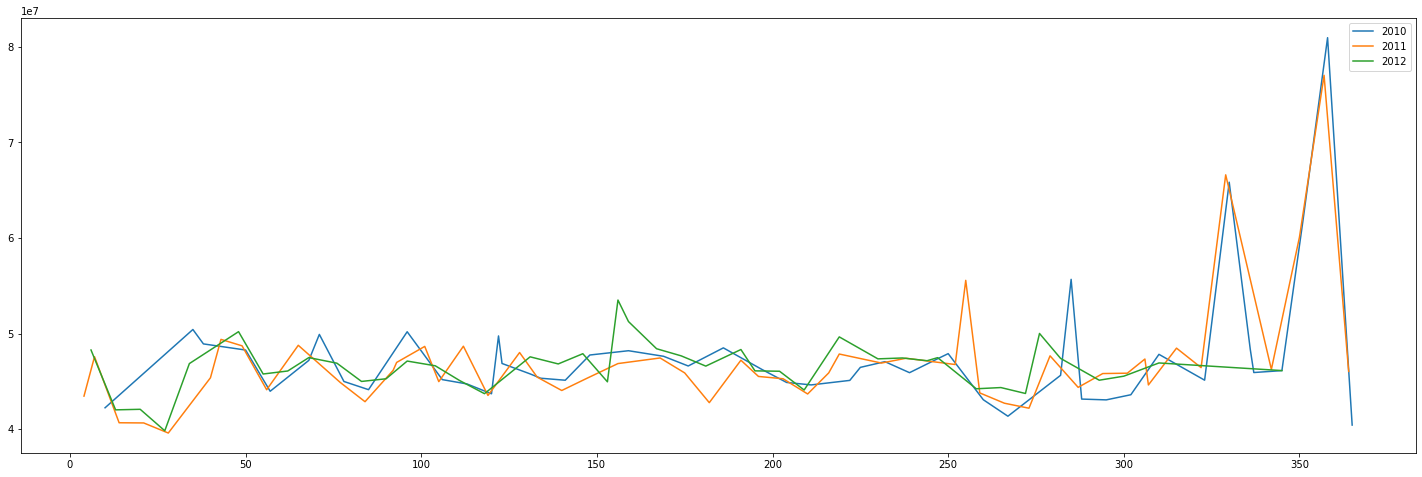

In [17]:
df10 = retails1.query('Year == 2010').groupby('Day', as_index=False).agg({'Weekly_Sales': 'sum'})
df11 = retails1.query('Year == 2011').groupby('Day', as_index=False).agg({'Weekly_Sales': 'sum'})
df12 = retails1.query('Year == 2012').groupby('Day', as_index=False).agg({'Weekly_Sales': 'sum'})
fig, ax = plt.subplots(figsize=(25,8))
ax.plot(df10.Day, df10.Weekly_Sales, label = "2010")
ax.plot(df11.Day, df11.Weekly_Sales, label = "2011")
ax.plot(df12.Day, df12.Weekly_Sales, label = "2012")
ax.legend()
plt.show()

Text(0, 0.5, 'Sales')

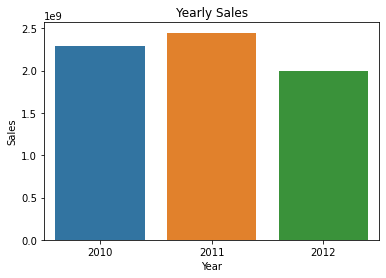

In [18]:
year_sales = retails1.groupby(retails1.Year).agg({"Weekly_Sales":"sum"})

sns.barplot(x=year_sales.index, y = year_sales.Weekly_Sales)
plt.title("Yearly Sales")
plt.xlabel("Year")
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

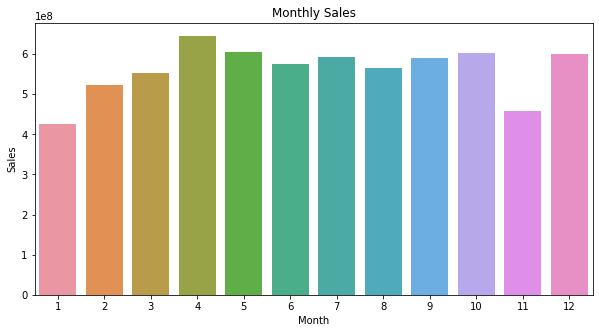

In [19]:
month_sales = retails1.groupby(retails1.Month).agg({"Weekly_Sales":"sum"})
plt.figure(figsize=(10, 5))
sns.barplot(x=month_sales.index, y=month_sales.Weekly_Sales)
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Sales")

In [20]:
type = retails1.groupby('Type', as_index=False).agg(Mean=('Weekly_Sales', 'mean'), Sum=('Weekly_Sales', 'sum'))
print(type)

  Mean           Sum
0    A  20099.568043
1    B  12237.075977
2    C   9519.532538


Text(0.5, 1.0, 'Mean weekly sales by years')

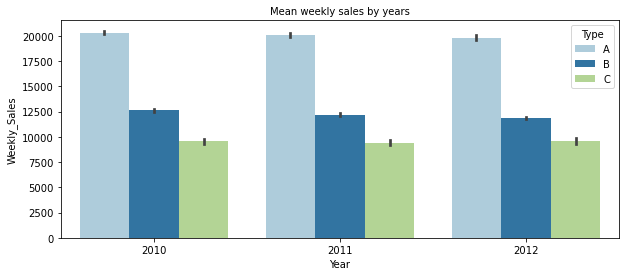

In [21]:
plt.figure(figsize = (10,4))
ax = sns.barplot(x="Year", y="Weekly_Sales", hue="Type", data=retails1, palette= "Paired")
ax.set_title('Mean weekly sales by years', fontsize=10)

C:\Users\14830\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\14830\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\14830\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\14830\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height

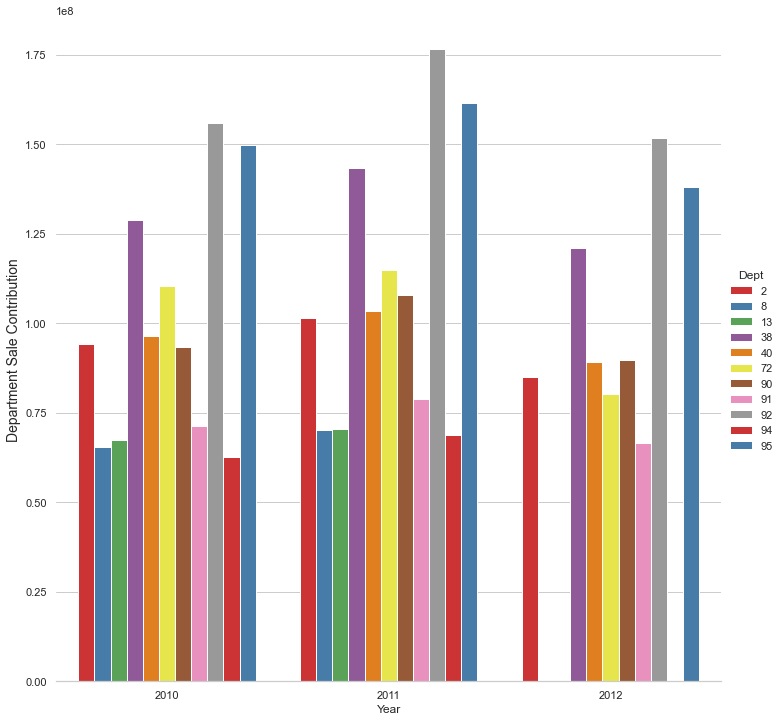

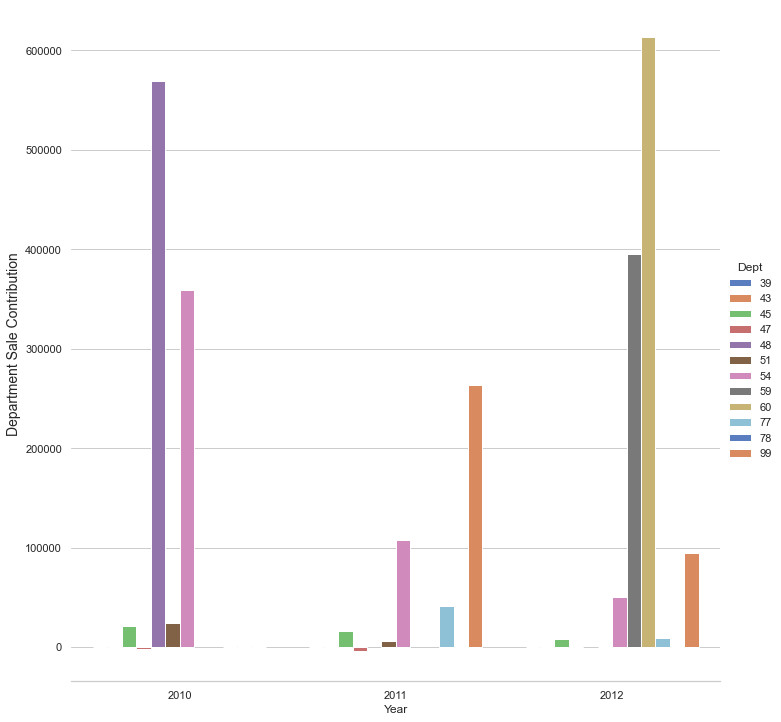

In [22]:
dept_sales = retails1.groupby(by=(['Dept', 'Year']), as_index=False)['Weekly_Sales'].sum()
top_depts = dept_sales.nlargest(30, 'Weekly_Sales')
sns.set(style="whitegrid")
g = sns.factorplot(x="Year", y="Weekly_Sales", hue="Dept", data=top_depts,
                   size=10, kind="bar", palette="Set1")
g.despine(left=True)
g.set_ylabels("Department Sale Contribution", fontsize = 14)

bottom_depts = dept_sales.nsmallest(30, 'Weekly_Sales')
sns.set(style="whitegrid")
g = sns.factorplot(x="Year", y="Weekly_Sales", hue="Dept", data=bottom_depts,
                   size=10, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Department Sale Contribution", fontsize = 14)

In [23]:
##profit Sales by Dept
profit1 = sales.loc[sales['Weekly_Sales'] > 0]
profit1 = profit1.rename(columns={'Date':'Date_'}, inplace=False)

custom_aggregation = {}
custom_aggregation["Weekly_Sales"] = "mean"
profit_dept = profit1.groupby("Dept").agg(custom_aggregation)
profit_dept.columns = ["Profit Sales"]
profit_dept['Dept'] = profit_dept.index

Dept = profit_dept['Dept'].tolist()
Sales = profit_dept['Profit Sales'].tolist()

fig = px.pie(profit_dept, values=Sales, names=Dept)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig['layout'].update(height=500, width=700, title='Profit Sales by Dept')
fig.show()

In [24]:
#Lose Sales by Dept
loss1 = sales.loc[sales['Weekly_Sales'] < 0]
loss1 = loss1.rename(columns={'Date':'Date_'}, inplace=False)

custom_aggregation = {}
custom_aggregation["Weekly_Sales"] = "mean"
loss_dept = loss1.groupby("Dept").agg(custom_aggregation)
loss_dept.columns = ["Lose Sales"]
loss_dept['Dept'] = loss_dept.index
loss_dept['Lose Sales'] = abs(loss_dept['Lose Sales'])

Dept = loss_dept['Dept'].tolist()
Sales = loss_dept['Lose Sales'].tolist()

fig = px.pie(loss_dept, values=Sales, names=Dept)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig['layout'].update(height=500, width=700, title='Lose Sales by Dept')
fig.show()

In [25]:
storeDF_fig = px.pie(stores, values=stores['Size'], names=stores['Store'])
storeDF_fig.update_traces(textposition='inside')
storeDF_fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
storeDF_fig['layout'].update(height=500, width=700, title='Store by Size')
storeDF_fig.show()

In [26]:
##profit Sales by Store
profit2 = sales.loc[sales['Weekly_Sales'] > 0]
profit2 = profit2 .rename(columns={'Date':'Date_'}, inplace=False)

custom_aggregation = {}
custom_aggregation["Weekly_Sales"] = "mean"
profit_store = profit2.groupby("Store").agg(custom_aggregation)
profit_store.columns = ["Profit Sales"]
profit_store['Store'] = profit_store.index

Store = profit_store['Store'].tolist()
Sales = profit_store['Profit Sales'].tolist()

fig = px.pie(profit_store, values=Sales, names=Store)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig['layout'].update(height=500, width=700, title='Profit Sales by Store')
fig.show()

In [27]:
##Lose Sales by Store
loss2 = sales.loc[sales['Weekly_Sales'] < 0]
loss2 = loss2.rename(columns={'Date':'Date_'}, inplace=False)

custom_aggregation = {}
custom_aggregation["Weekly_Sales"] = "mean"
loss_store = loss2.groupby("Store").agg(custom_aggregation)
loss_store.columns = ["Lose Sales"]
loss_store['Store'] = loss_store.index
loss_store['Lose Sales'] = abs(loss_store['Lose Sales'])

Store = loss_store['Store'].tolist()
Sales = loss_store['Lose Sales'].tolist()

fig = px.pie(loss_store, values=Sales, names=Store)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig['layout'].update(height=500, width=700, title='Lose Sales by Store')
fig.show()

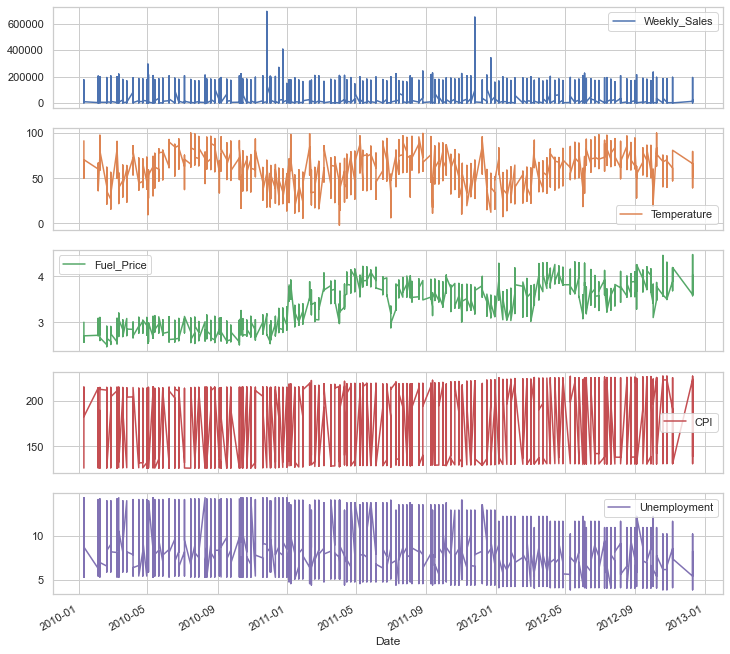

In [28]:
retails1[['Weekly_Sales','Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].plot(x='Date', subplots=True, figsize=(12,12))
plt.show()

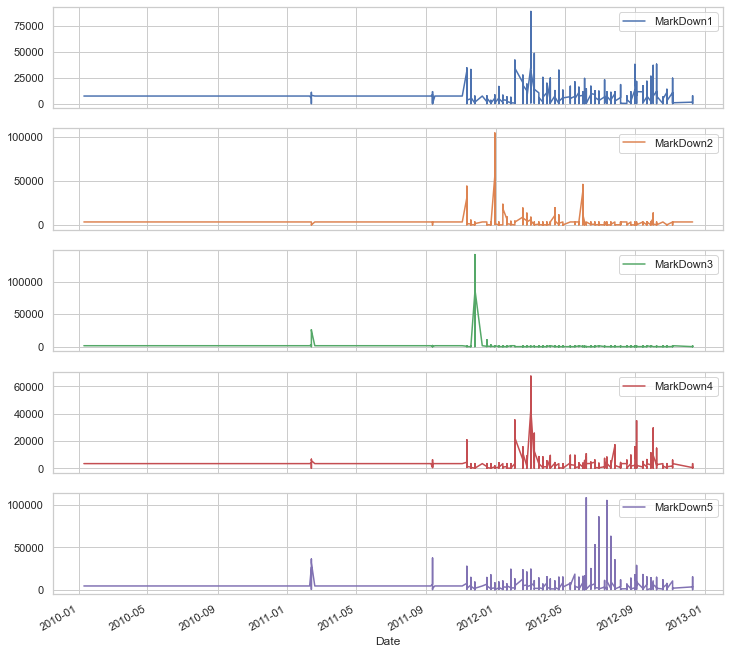

In [29]:
retails1[['Date', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(x='Date', subplots=True, figsize=(12,12))
plt.show()

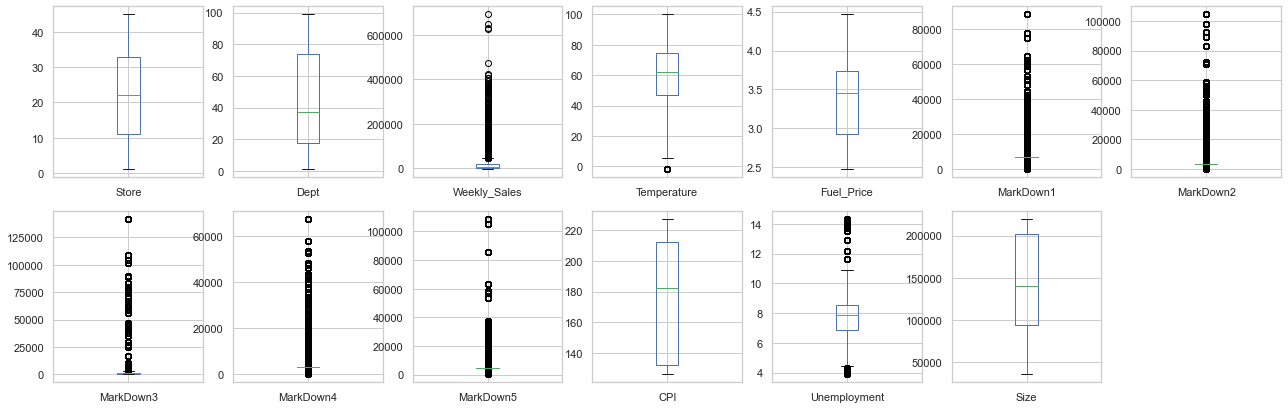

In [30]:
#boxplot
retails.plot(kind = 'box', subplots = True, layout = (6, 7), sharex = False, sharey = False, figsize = (22, 22));
plt.show()

### Correlation Matrix

In [31]:
retails.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99]).T

count           mean           std        min            5%  \
Store         421570.0      22.200546     12.785297      1.000      3.000000   
Dept          421570.0      44.260317     30.492054      1.000      4.000000   
Weekly_Sales  421570.0   15981.258123  22711.183519  -4988.940     59.974500   
Temperature   421570.0      60.090059     18.447931     -2.060     27.310000   
Fuel_Price    421570.0       3.361027      0.458515      2.472      2.653000   
MarkDown1     421570.0    7246.420196   4956.920816      0.270    709.320000   
MarkDown2     421570.0    3334.628621   4867.493911   -265.760     22.800000   
MarkDown3     421570.0    1439.421384   5487.601593    -29.100      2.700000   
MarkDown4     421570.0    3383.168256   3560.353127      0.220    273.530000   
MarkDown5     421570.0    4628.975079   3573.795304    135.160   1288.810000   
CPI           421570.0     171.201947     39.159276    126.064    126.496258   
Unemployment  421570.0       7.960289      1.863296      3.879      5.326000   
Size          421570.0  136727.915739  60980.583328  34875.000  39690.000000   

                       25%            50%            75%            90%  \
Store            11.000000      22.000000      33.000000      40.000000   
Dept             18.000000      37.000000      74.000000      92.000000   
Weekly_Sales   2079.650000    7612.030000   20205.852500   42845.673000   
Temperature      46.680000      62.090000      74.280000      83.580000   
Fuel_Price        2.933000       3.452000       3.738000       3.917000   
MarkDown1      7246.420196    7246.420196    7246.420196    8624.560000   
MarkDown2      3334.628621    3334.628621    3334.628621    3334.628621   
MarkDown3       115.390000    1439.421384    1439.421384    1439.421384   
MarkDown4      3383.168256    3383.168256    3383.168256    3383.168256   
MarkDown5      4628.975079    4628.975079    4628.975079    5284.630000   
CPI             132.022667     182.318780     212.416993     219.444244   
Unemployment      6.891000       7.866000       8.572000       9.816000   
Size          93638.000000  140167.000000  202505.000000  204184.000000   

                        95%            99%            max  
Store             43.000000      45.000000      45.000000  
Dept              95.000000      98.000000      99.000000  
Weekly_Sales   61201.951000  106479.586000  693099.360000  
Temperature       87.270000      92.810000     100.140000  
Fuel_Price         4.029000       4.202000       4.468000  
MarkDown1      12407.710000   28177.290000   88646.760000  
MarkDown2       3789.560000   21813.160000  104519.540000  
MarkDown3       1439.421384    2083.280000  141630.610000  
MarkDown4       5163.630000   16822.460000   67474.850000  
MarkDown5       7456.150000   15590.530000  108519.280000  
CPI              221.941558     225.473509     227.232807  
Unemployment      12.187000      14.180000      14.313000  
Size          206302.000000  219622.000000  219622.000000

In [32]:
retails.corr().round(2)

Store  Dept  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
Store          1.00  0.02         -0.09      -0.00        -0.05        0.07   
Dept           0.02  1.00          0.15       0.00         0.00        0.00   
Weekly_Sales  -0.09  0.15          1.00       0.01        -0.00       -0.00   
IsHoliday     -0.00  0.00          0.01       1.00        -0.16       -0.08   
Temperature   -0.05  0.00         -0.00      -0.16         1.00        0.14   
Fuel_Price     0.07  0.00         -0.00      -0.08         0.14        1.00   
MarkDown1     -0.07 -0.00          0.05      -0.02        -0.02        0.02   
MarkDown2     -0.02  0.00          0.01       0.20        -0.16       -0.07   
MarkDown3     -0.02  0.00          0.04       0.26        -0.05       -0.04   
MarkDown4     -0.01  0.00          0.03      -0.00        -0.03       -0.02   
MarkDown5     -0.02  0.00          0.06      -0.03        -0.01       -0.05   
CPI           -0.21 -0.01         -0.02      -0.00         0.18       -0.16   
Unemployment   0.21  0.01         -0.03       0.01         0.10       -0.03   
Size          -0.18 -0.00          0.24       0.00        -0.06        0.00   

              MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5   CPI  \
Store             -0.07      -0.02      -0.02      -0.01      -0.02 -0.21   
Dept              -0.00       0.00       0.00       0.00       0.00 -0.01   
Weekly_Sales       0.05       0.01       0.04       0.03       0.06 -0.02   
IsHoliday         -0.02       0.20       0.26      -0.00      -0.03 -0.00   
Temperature       -0.02      -0.16      -0.05      -0.03      -0.01  0.18   
Fuel_Price         0.02      -0.07      -0.04      -0.02      -0.05 -0.16   
MarkDown1          1.00       0.02      -0.11       0.79       0.16 -0.03   
MarkDown2          0.02       1.00      -0.05      -0.01      -0.01 -0.02   
MarkDown3         -0.11      -0.05       1.00      -0.07      -0.02 -0.01   
MarkDown4          0.79      -0.01      -0.07       1.00       0.11 -0.03   
MarkDown5          0.16      -0.01      -0.02       0.11       1.00  0.04   
CPI               -0.03      -0.02      -0.01      -0.03       0.04  1.00   
Unemployment       0.03       0.01       0.01       0.01      -0.00 -0.30   
Size               0.21       0.05       0.03       0.08       0.18 -0.00   

              Unemployment  Size  
Store                 0.21 -0.18  
Dept                  0.01 -0.00  
Weekly_Sales         -0.03  0.24  
IsHoliday             0.01  0.00  
Temperature           0.10 -0.06  
Fuel_Price           -0.03  0.00  
MarkDown1             0.03  0.21  
MarkDown2             0.01  0.05  
MarkDown3             0.01  0.03  
MarkDown4             0.01  0.08  
MarkDown5            -0.00  0.18  
CPI                  -0.30 -0.00  
Unemployment          1.00 -0.07  
Size                 -0.07  1.00

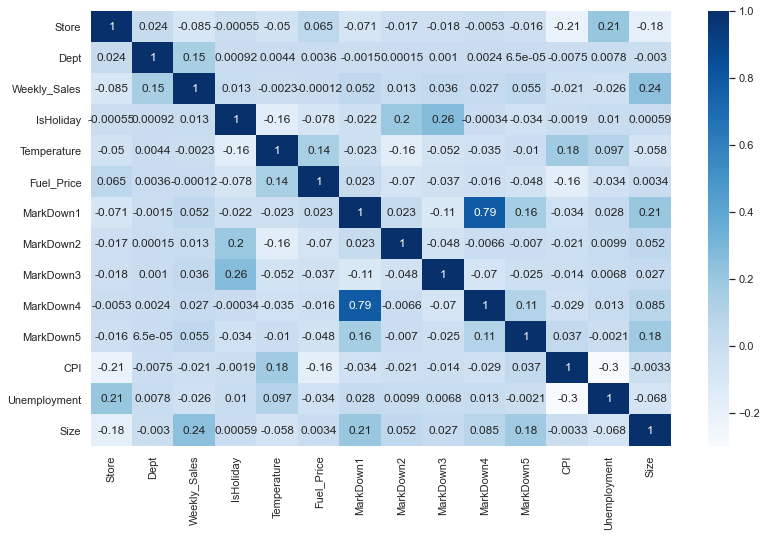

In [33]:
plt.figure(figsize=(13,8))
sns.heatmap(retails.corr(),cmap='Blues',annot=True)

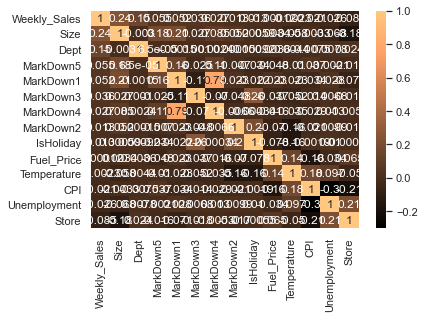

In [34]:
#Week sales correlation matrix
#number of variables for heatmap
k = 50
cols = retails.corr().nlargest(k, 'Weekly_Sales')['Weekly_Sales'].index
cm = retails[cols].corr()
sns.heatmap(cm, annot=True, cmap = 'copper')
#plt.figure(figsize=(10,10))
plt.show()

### Feature Engineering

In [35]:
holiday1 = pd.get_dummies(retails1["IsHoliday"])
holiday1 = holiday1.rename(columns={False: "Not Holiday", True: "Holiday"})

retails1 = pd.concat([retails1, holiday1], axis = 1)
#retails1.drop("IsHoliday", axis = 1, inplace = True)

In [36]:
retails1 = retails1.applymap(lambda x: 1 if x == True  else x)
retails1 = retails1.applymap(lambda x: 0 if x == False  else x)

#holiday2 = retails1.applymap(lambda x: 1 if x == True  else x)
#holiday2 = retails1.applymap(lambda x: 0 if x == False  else x)
#holiday2 = retails1['IsHoliday'].map({True:1, False:0})
#display(holiday1)

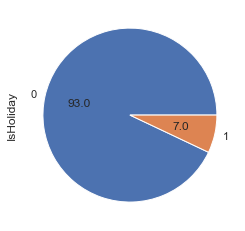

In [37]:
#Isholiday
retails1["IsHoliday"].value_counts().plot.pie(autopct = "%.1f")
#holiday1.value_counts().plot.pie(autopct = "%.1f")

In [38]:
retails1['Type'] = retails1['Type'].astype('category')
type1 = retails1.rename(columns={"A": "Type A", "B": "Type B", "C": "Type C"})
retails1 = pd.get_dummies(retails1['Type'])
retails1
retails1 = pd.concat([type1, retails1], axis = 1)
#retails1.drop("Type", axis = 1, inplace = True)

In [39]:
#store
store1 = pd.get_dummies(retails1["Store"])
store1 = store1.rename(columns=lambda x: 'Store' + str(x))

retails1 = pd.concat([retails1, store1], axis = 1)
#retails1.drop("Store", axis = 1, inplace = True)

In [40]:
#department
Dept1 = pd.get_dummies(retails1["Dept"])
Dept1 = Dept1.rename(columns=lambda x: 'Dept' + str(x))

retails1 = pd.concat([retails1, Dept1], axis = 1)
#retails1.drop("Dept", axis = 1, inplace = True)

In [41]:
#week
#week1 = pd.get_dummies(retails1["Week"])
#week1 = week1.rename(columns=lambda x: 'Week' + str(x))

#retails1 = pd.concat([retails1, week1], axis = 1)
#retails1.drop("Week", axis = 1, inplace = True)

In [42]:
display(retails1)

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  \
0           1     1 2010-05-02      24924.50          0        42.31   
1           1     1 2010-12-02      46039.49          1        38.51   
2           1     1 2010-02-19      41595.55          0        39.93   
3           1     1 2010-02-26      19403.54          0        46.63   
4           1     1 2010-05-03      21827.90          0        46.50   
...       ...   ...        ...           ...        ...          ...   
421565     45    98 2012-09-28        508.37          0        64.88   
421566     45    98 2012-05-10        628.10          0        64.89   
421567     45    98 2012-12-10       1061.02          0        54.47   
421568     45    98 2012-10-19        760.01          0        56.47   
421569     45    98 2012-10-26       1076.80          0        58.85   

        Fuel_Price    MarkDown1    MarkDown2    MarkDown3  ...  Dept90  \
0            2.572  7246.420196  3334.628621  1439.421384  ...       0   
1            2.548  7246.420196  3334.628621  1439.421384  ...       0   
2            2.514  7246.420196  3334.628621  1439.421384  ...       0   
3            2.561  7246.420196  3334.628621  1439.421384  ...       0   
4            2.625  7246.420196  3334.628621  1439.421384  ...       0   
...            ...          ...          ...          ...  ...     ...   
421565       3.997  4556.610000    20.640000     1.500000  ...       0   
421566       3.985  5046.740000  3334.628621    18.820000  ...       0   
421567       4.000  1956.280000  3334.628621     7.890000  ...       0   
421568       3.969  2004.020000  3334.628621     3.180000  ...       0   
421569       3.882  4018.910000    58.080000   100.000000  ...       0   

        Dept91  Dept92  Dept93 Dept94  Dept95  Dept96  Dept97  Dept98  Dept99  
0            0       0       0      0       0       0       0       0       0  
1            0       0       0      0       0       0       0       0       0  
2            0       0       0      0       0       0       0       0       0  
3            0       0       0      0       0       0       0       0       0  
4            0       0       0      0       0       0       0       0       0  
...        ...     ...     ...    ...     ...     ...     ...     ...     ...  
421565       0       0       0      0       0       0       0       1       0  
421566       0       0       0      0       0       0       0       1       0  
421567       0       0       0      0       0       0       0       1       0  
421568       0       0       0      0       0       0       0       1       0  
421569       0       0       0      0       0       0       0       1       0  

[421570 rows x 151 columns]

In [43]:
retails1.info

<bound method DataFrame.info of         Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  \
0           1     1 2010-05-02      24924.50          0        42.31   
1           1     1 2010-12-02      46039.49          1        38.51   
2           1     1 2010-02-19      41595.55          0        39.93   
3           1     1 2010-02-26      19403.54          0        46.63   
4           1     1 2010-05-03      21827.90          0        46.50   
...       ...   ...        ...           ...        ...          ...   
421565     45    98 2012-09-28        508.37          0        64.88   
421566     45    98 2012-05-10        628.10          0        64.89   
421567     45    98 2012-12-10       1061.02          0        54.47   
421568     45    98 2012-10-19        760.01          0        56.47   
421569     45    98 2012-10-26       1076.80          0        58.85   

        Fuel_Price    MarkDown1    MarkDown2    MarkDown3  ...  Dept90  \
0            2.572  7246.4201

In [44]:
retails1.columns.tolist()

['Store',
 'Dept',
 'Date',
 'Weekly_Sales',
 'IsHoliday',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'Type',
 'Size',
 'Year',
 'Month',
 'Day',
 'Week',
 'Not Holiday',
 'Holiday',
 'A',
 'B',
 'C',
 'Store1',
 'Store2',
 'Store3',
 'Store4',
 'Store5',
 'Store6',
 'Store7',
 'Store8',
 'Store9',
 'Store10',
 'Store11',
 'Store12',
 'Store13',
 'Store14',
 'Store15',
 'Store16',
 'Store17',
 'Store18',
 'Store19',
 'Store20',
 'Store21',
 'Store22',
 'Store23',
 'Store24',
 'Store25',
 'Store26',
 'Store27',
 'Store28',
 'Store29',
 'Store30',
 'Store31',
 'Store32',
 'Store33',
 'Store34',
 'Store35',
 'Store36',
 'Store37',
 'Store38',
 'Store39',
 'Store40',
 'Store41',
 'Store42',
 'Store43',
 'Store44',
 'Store45',
 'Dept1',
 'Dept2',
 'Dept3',
 'Dept4',
 'Dept5',
 'Dept6',
 'Dept7',
 'Dept8',
 'Dept9',
 'Dept10',
 'Dept11',
 'Dept12',
 'Dept13',
 'Dept14',
 'Dept16',
 'Dept17',
 'Dept18',
 'Dept

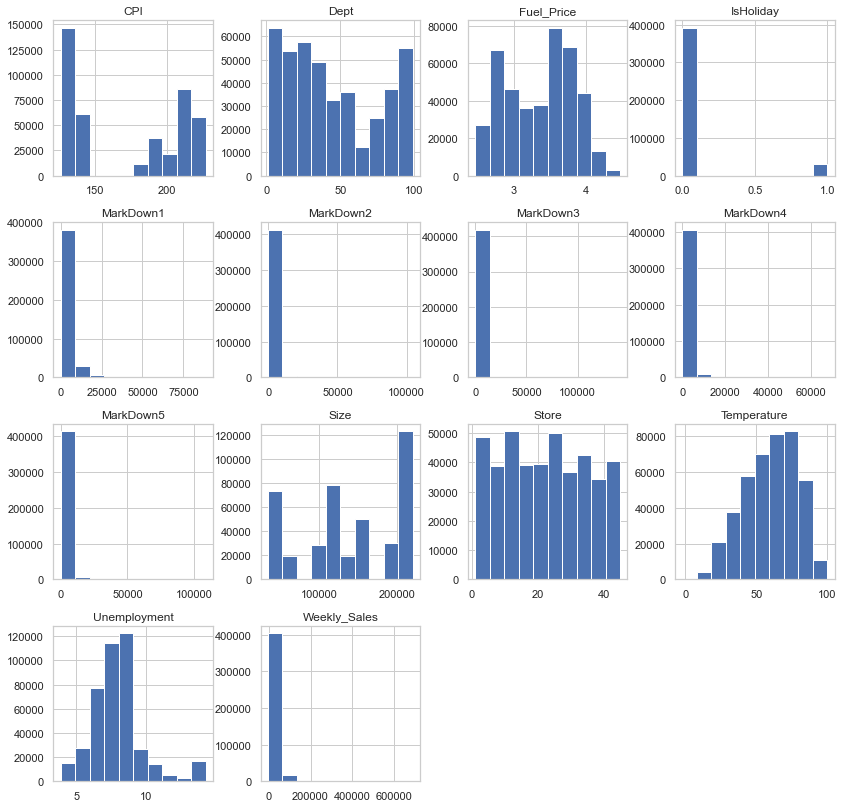

In [45]:
numbers = pd.Series(retails.columns)
retails1[numbers].hist(figsize = (14, 14))
plt.show()

### Data Reduction: PCA

In [46]:
features = retails1.columns.tolist()
#x = retails1[features].drop(['Weekly_Sales', 'Type', 'Date', 'IsHoliday', 'Store', 'Dept'],axis=1)
x = retails1[features].drop(['Weekly_Sales', 'Type', 'Date', 'IsHoliday', 'Week', 'Year', 'Month', 'Day', 'Store', 'Dept'],axis=1)
y = retails1['Weekly_Sales']

In [49]:
# Standardizing the features
X = StandardScaler().fit_transform(x)

#reduce deminsion to X
pca1 = PCA()
pca1.fit(X)
#principalcomponents = pca1.fit_transform(X)
#principalcomponents.fit(X.iloc[:, :].dropna(axis=0))

num_components1 = len(pca1.explained_variance_ratio_)
ind = np.arange(num_components1)
vals = pca1.explained_variance_ratio_
cumvals = np.cumsum(vals)

pcaSummary = pd.DataFrame({'Standard deviation': np.sqrt(pca1.explained_variance_),
                           'Proportion of variance': vals,
                           'Cumulative proportion': cumvals})
pcaSummary = pcaSummary.transpose()
pcaSummary.columns = ['pca{}'.format(i) for i in range(1, len(pcaSummary.columns) + 1)]
pcaSummary.round(4)

pca1    pca2    pca3    pca4    pca5    pca6  \
Standard deviation      1.9032  1.5933  1.5327  1.5044  1.3470  1.3115   
Proportion of variance  0.0257  0.0180  0.0167  0.0161  0.0129  0.0122   
Cumulative proportion   0.0257  0.0437  0.0604  0.0764  0.0893  0.1015   

                          pca7    pca8    pca9   pca10  ...  pca132  pca133  \
Standard deviation      1.1768  1.1214  1.1040  1.0786  ...  0.4397  0.1927   
Proportion of variance  0.0098  0.0089  0.0086  0.0083  ...  0.0014  0.0003   
Cumulative proportion   0.1113  0.1202  0.1289  0.1371  ...  0.9997  1.0000   

                        pca134  pca135  pca136  pca137  pca138  pca139  \
Standard deviation      0.0351     0.0     0.0     0.0     0.0     0.0   
Proportion of variance  0.0000     0.0     0.0     0.0     0.0     0.0   
Cumulative proportion   1.0000     1.0     1.0     1.0     1.0     1.0   

                        pca140  pca141  
Standard deviation         0.0     0.0  
Proportion of variance     0.0     0.0  
Cumulative proportion      1.0     1.0  

[3 rows x 141 columns]

C:\Users\14830\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\14830\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Retails: Explained Variance per Principal Component')

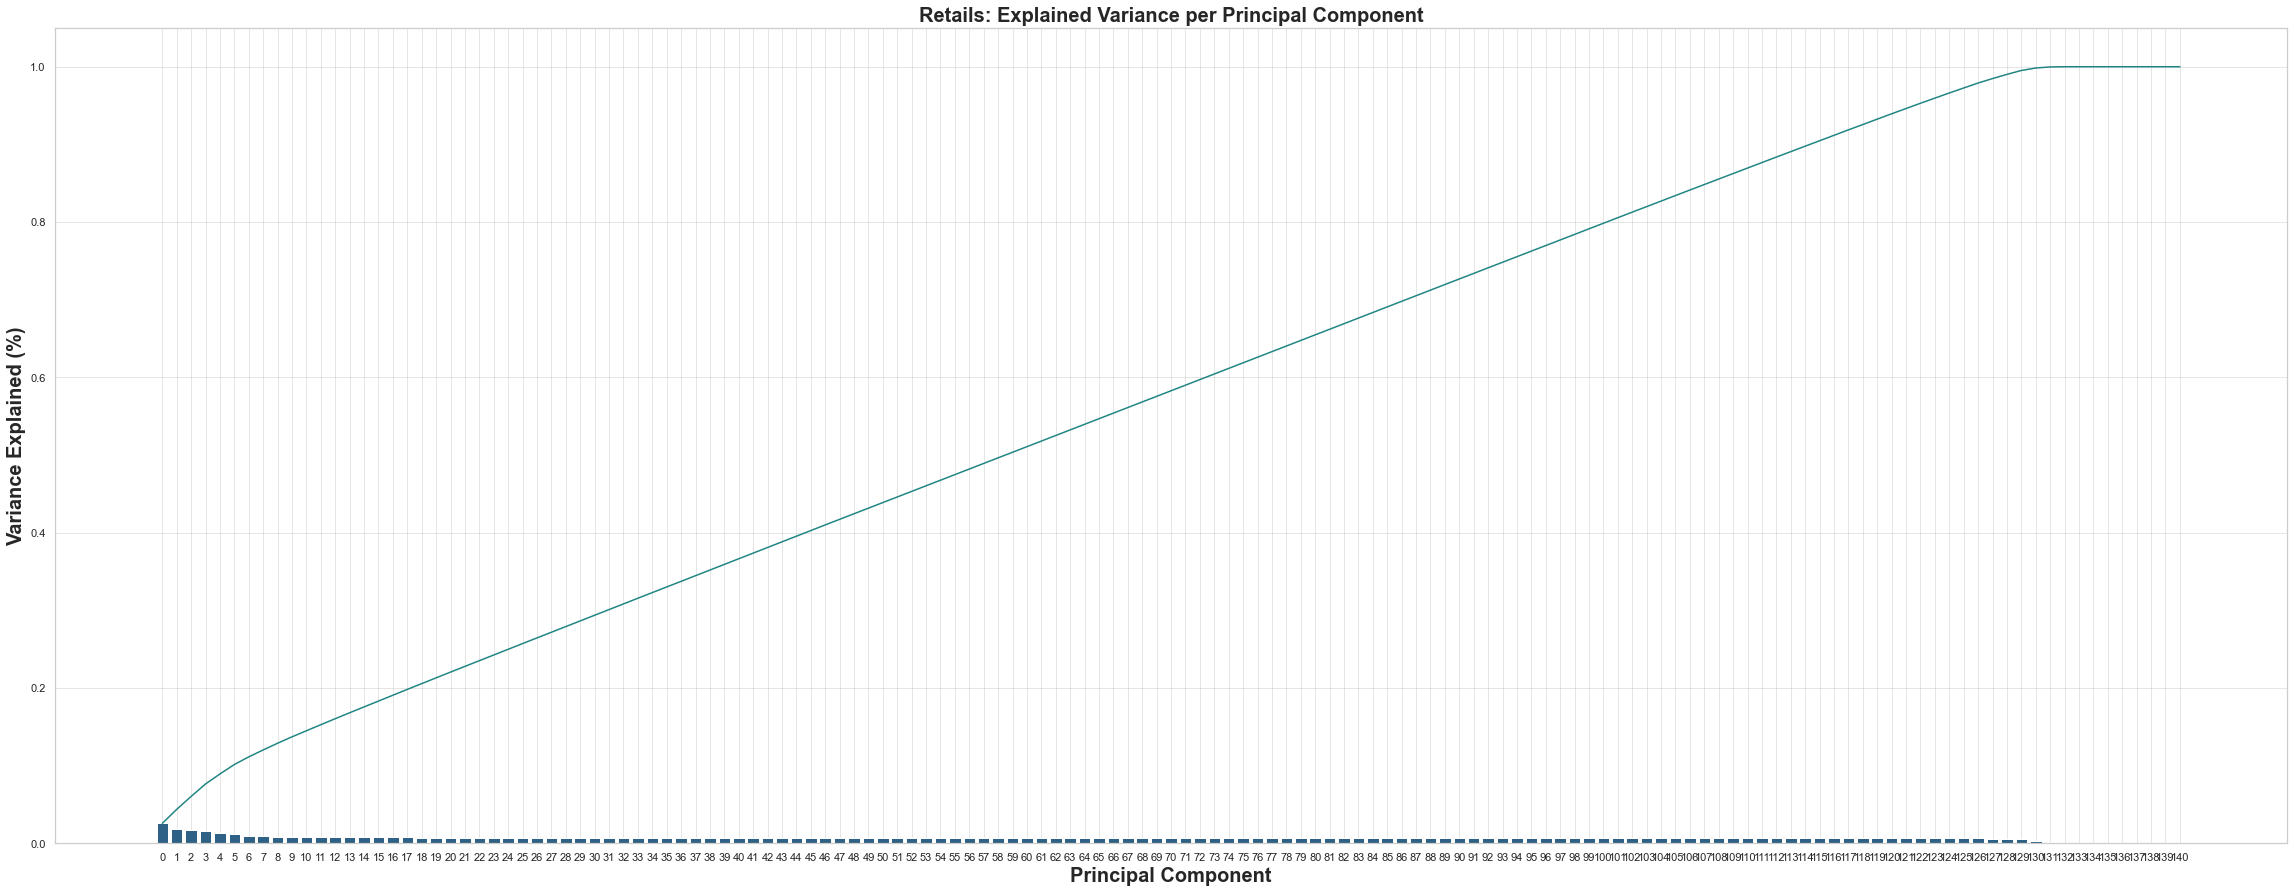

In [50]:
# Scree plot (variance explained by each principal component)
import matplotlib.ticker as ticker

color_use = ['#206394','#208582','#42c4c7','#8786a7','#f6cd61','#fe8a71','#ED4534','#BC342C']
plt.figure(figsize=(40,15))
ax = sns.barplot(ind, vals, palette=color_use[:1], ci=None)
ax2 = sns.lineplot(ind, cumvals, color=color_use[1], ci=None)
ax.grid(b=True, which='major', linewidth=0.5)

#ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_xlabel("Principal Component", fontsize=20, weight='bold')
ax.set_ylabel("Variance Explained (%)", fontsize=20, weight='bold')
plt.title('Retails: Explained Variance per Principal Component', fontsize=20, weight='bold')

In [51]:
#retailsPCA_des = pd.DataFrame(pca1.components_.transpose(), columns=pcaSummary.columns, index=x.columns)
#retailsPCA_des.iloc[:,:50]
#retailsPCA_des = retailsPCA_des.iloc[:,:50]
#display(retailsPCA_des)

In [52]:
#reduce deminsion to X only
num_components2 = len(cumvals[cumvals <= 0.80])
print(num_components2)

# rerun PCA with components that explain 80% of the variance
pca2 = PCA(n_components = num_components2, whiten=True)
principalcomponents = pca2.fit_transform(X)
#principalcomponents = pca1.fit(X)
#principalcomponents = pca1.transform(X)
np.cumsum(pca2.explained_variance_ratio_)

101


array([0.02568989, 0.0436947 , 0.06035384, 0.07640281, 0.08926602,
       0.10145782, 0.11125623, 0.12010314, 0.12866405, 0.13687787,
       0.14469881, 0.15242466, 0.16008964, 0.16772201, 0.17525756,
       0.1827491 , 0.19020719, 0.197661  , 0.20508953, 0.21247376,
       0.21983273, 0.22718367, 0.23452225, 0.24184139, 0.24914868,
       0.25645431, 0.26374996, 0.27104062, 0.27832674, 0.28560875,
       0.29287969, 0.30014951, 0.30741663, 0.31468163, 0.32194316,
       0.32920184, 0.33645957, 0.34371456, 0.35096556, 0.35821383,
       0.36545942, 0.37270241, 0.3799382 , 0.38717132, 0.39439763,
       0.4016213 , 0.40883441, 0.41603655, 0.42323868, 0.4304408 ,
       0.43764291, 0.44484495, 0.45204687, 0.45924864, 0.46645034,
       0.47365182, 0.48085295, 0.48805385, 0.49525448, 0.50245481,
       0.50965465, 0.51685316, 0.52405143, 0.53124888, 0.53844599,
       0.54564238, 0.55283793, 0.56003326, 0.56722763, 0.57442062,
       0.5816132 , 0.58880526, 0.5959954 , 0.60318395, 0.61037

In [53]:
pcaDF = pd.DataFrame(data = principalcomponents, columns = pcaSummary.columns.tolist()[0:101])

In [54]:
#new dataset using PCA
retailsPCA = pd.concat([pcaDF, y], axis = 1)
display(retailsPCA)

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0       0.758927 -0.382871 -0.834661  0.090779  0.380512 -0.292356 -1.025524   
1       0.769977  0.180060 -0.810921  3.282389  1.272692 -0.292707 -0.145284   
2       0.761614 -0.363756 -0.845071  0.117751  0.373332 -0.269804 -1.118406   
3       0.757948 -0.418831 -0.848407  0.062221  0.417239 -0.332339 -0.941014   
4       0.756121 -0.417633 -0.833319  0.051743  0.405212 -0.332452 -0.898155   
...          ...       ...       ...       ...       ...       ...       ...   
421565 -0.866930  0.442540 -0.081035 -0.605381  0.177764 -0.834275  0.145821   
421566 -0.857926  0.484737 -0.054355 -0.518174  0.250910 -0.717355  0.105264   
421567 -0.892059  0.494638 -0.122116 -0.379633 -0.108879 -0.968257 -0.168845   
421568 -0.939932  0.456527 -0.142910 -0.353860 -0.187733 -1.023773 -0.126437   
421569 -0.933926  0.440005 -0.149361 -0.469392 -0.090942 -0.974362 -0.061821   

            pca8      pca9     pca10  ...     pca93     pca94     pca95  \
0       1.115084 -0.224684  0.396370  ...  0.416660 -0.014144 -0.183372   
1       1.252738 -0.211119  0.363582  ...  0.378412 -0.076191 -0.127038   
2       1.130804 -0.211157  0.407274  ...  0.419272 -0.008529 -0.185618   
3       1.121963 -0.192719  0.419516  ...  0.417095 -0.012898 -0.186245   
4       1.101932 -0.225687  0.395022  ...  0.414147 -0.019223 -0.182291   
...          ...       ...       ...  ...       ...       ...       ...   
421565 -0.732498 -1.346733 -0.710429  ...  0.821427  1.140650 -0.640919   
421566 -0.686786 -1.453904 -0.600838  ...  0.843485  1.189163 -0.656999   
421567 -0.869522 -1.316072 -0.864293  ...  0.872405  1.180962 -0.661987   
421568 -0.821910 -1.519754 -0.612735  ...  0.846712  1.191931 -0.683700   
421569 -0.734562 -1.532688 -0.491277  ...  0.804979  1.159759 -0.673610   

           pca96     pca97     pca98     pca99    pca100    pca101  \
0       0.649164  0.203717 -0.445604 -0.691296  0.262266 -0.134429   
1       0.982070  0.128659 -0.366111 -0.505576  0.299757 -0.086251   
2       0.650041  0.200961 -0.449163 -0.695904  0.268973 -0.143722   
3       0.649706  0.203043 -0.444301 -0.684619  0.261994 -0.126405   
4       0.648499  0.206192 -0.441511 -0.683877  0.255414 -0.121734   
...          ...       ...       ...       ...       ...       ...   
421565 -0.210111 -0.690461 -0.270836  2.204412 -0.099625  0.752147   
421566 -0.305308 -0.671907 -0.298531  2.084715 -0.183458  0.778866   
421567 -0.292099 -0.673838 -0.285044  2.039690 -0.186140  0.723836   
421568 -0.313988 -0.679081 -0.299252  2.090370 -0.168510  0.757254   
421569 -0.233650 -0.700433 -0.289083  2.240914 -0.069256  0.758466   

        Weekly_Sales  
0           24924.50  
1           46039.49  
2           41595.55  
3           19403.54  
4           21827.90  
...              ...  
421565        508.37  
421566        628.10  
421567       1061.02  
421568        760.01  
421569       1076.80  

[421570 rows x 102 columns]

## Modeling by Original Data 

In [55]:
#Split the data into 80% training and 20% testing
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.2, random_state=42)

#### 1. Linear Regression model

In [56]:
#start timer
startTime = perf_counter()

lr = LinearRegression()
lr.fit(X_train1, y_train1)

print("-------------------------------")
print("Linear Regression: ")
print("-------------------------------")

fullsmp_lr = lr.score(x, y)
print("Full sample R-squared:", fullsmp_lr)

y_pred_lr_train1 = lr.predict(X_train1)
y_pred_lr_test1 = lr.predict(X_test1)

lr_trainScore1 = lr.score(X_train1, y_train1)
lr_testScore1 = lr.score(X_test1, y_test1)
print("Train Score:", lr_trainScore1)
print("Test Score:", lr_testScore1)

#Using cross validation
#cv_lr = cross_validate(lr, x, y, cv=ShuffleSplit(n_splits=50, test_size=.2), scoring = 'r2')
cv_lr = cross_val_score(lr, x, y, cv=ShuffleSplit(n_splits=5, test_size=.2), scoring = 'r2').mean()
#cv_lr = cross_val_score(lr, X_test, y_test, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2').mean()
#print("Test Score(Cross Validation):", cv_lr)
print(" ")

print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)
 
mse_lr = mean_squared_error(y_test1, y_pred_lr_test1)
r2_lr = adjusted_r2_score(y_test1, y_pred_lr_test1, lr)
print('Mean squared error (MSE): %.4f' % mse_lr)
print('Coefficient of determination (R^2): %.4f' % r2_lr)
print(" ")

print('Train Set：')
regressionSummary(y_train1, y_pred_lr_train1)
print(" ")
print('Test Set：')
regressionSummary(y_test1, y_pred_lr_test1)

me_lr = round(np.mean(y_test1 - y_pred_lr_test1), 4)
rmse_lr = round(np.sqrt(metrics.mean_squared_error(y_test1, y_pred_lr_test1)), 4)
mae_lr = round(metrics.mean_absolute_error(y_test1, y_pred_lr_test1), 4)

#end timer
endTime = perf_counter()
time1 = endTime-startTime
print("Total time:", time1)

-------------------------------
Linear Regression: 
-------------------------------
Full sample R-squared: 0.6578756799122046
Train Score: 0.6581011324806736
Test Score: 0.6569860815224358
 
Coefficients: [-1.10866766e+01 -6.70858313e+02 -2.73562731e-03 -4.51751034e-02
  9.67356078e-02 -2.28834305e-02  3.47541564e-02  3.40094886e+01
 -4.00676522e+02 -1.21003537e+05  1.00736027e+10  1.00736033e+10
  4.04712217e+10  4.27605869e+10  2.88309072e+10 -1.57351040e+07
  6.15448255e+09 -1.60902028e+10  6.58477558e+09 -1.63947705e+10
  6.17843564e+09 -1.20582406e+10  4.39591509e+08 -5.38852731e+09
 -5.30634265e+09  6.78272466e+09 -7.03355758e+09  8.24966207e+09
  5.98399154e+09 -5.64214606e+09 -1.36937259e+10 -9.33867968e+09
 -6.01531383e+09  6.33743612e+09  6.32812535e+09 -3.65405889e+09
 -6.14793498e+09 -6.75585303e+09  6.33743500e+09 -5.11336216e+09
  1.29222058e+08  6.38160689e+09  6.63788860e+09 -9.28423203e+09
 -1.48338851e+09  6.32908309e+09  6.23917533e+09 -1.35227728e+10
  8.06962815e+0

In [90]:
#with cross-validation
lr2 = LinearRegression()
lr2.fit(X_train1, y_train1)

cv_lr2 = cross_validate(lr2, x, y, cv=ShuffleSplit(n_splits=5, test_size=.2), scoring = 'r2', return_train_score=True)
lr2_train = np.mean(cv_lr2['train_score'])
lr2_test = np.mean(cv_lr2['test_score'])

print('Train Score',"{:.4%}".format(lr2_train))
print('Test Score',"{:.4%}".format(lr2_test))

Train Score 65.7597%
Test Score 65.8999%


#### 2. Ridge Regression

In [57]:
#start timer
startTime = perf_counter()

#ridge = Ridge(alpha=alpha_ridge)
alpha_ridge = np.arange(start=0.5,stop=30.0,step=6)
length_ridge1 = len(alpha_ridge)
ridge_trainScore1 = []
ridge_testScore1 = []
#training_score1 = []
#test_score1 = []
#coef1 = []

for i in range(length_ridge1):
    ridge = Ridge(alpha=alpha_ridge[i])
    ridge.fit(X_train1, y_train1)
    y_pred_ridge_train1 = ridge.predict(X_train1)
    y_pred_ridge_test1 = ridge.predict(X_test1)
    #Using cross validation
    cv_ridge = cross_val_score(ridge, x, y, cv=ShuffleSplit(n_splits=5, test_size=.2), scoring = 'r2')
    #cv_ridge = cross_val_score(ridge, X_test1, y_test1, cv=ShuffleSplit(n_splits=20, test_size=.2), scoring = 'r2')
    #ridge_trainScore1 = ridge.score(X_train1, y_train1)
    #ridge_testScore1 = ridge.score(X_test1, y_test1)
    
    #store train accuracy
    ridge_trainScore1.append(ridge.score(X_train1, y_train1))
    #training_score1.append(np.mean(ridge_trainScore1))
    #store test accuracy
    ridge_testScore1.append(ridge.score(X_test1, y_test1))
    #test_score1.append(np.mean(ridge_testScore1))
    #coef1.append(ridge.coef_)


print("-------------------------------")
print("Ridge Regression: ")
print("-------------------------------")

fullsmp_ridge = ridge.score(x, y)
print("Full sample R-squared:", fullsmp_ridge)
print(" ")

dataframe_ridge = {'Alpha': alpha_ridge,
                   'Train Set Score': ridge_trainScore1,
                   'Test Set Score': ridge_testScore1,
                   "Test Score(Cross Validation)" : cv_ridge}
 
table_ridge = pd.DataFrame(dataframe_ridge)
table_ridge.index += 1
table_ridge = table_ridge.sort_values(["Test Score(Cross Validation)","Test Set Score"], ascending=[False,False])
#table_ridge = table_ridge.sort_values("Test Set Score", ascending=False)
#table_ridge = table_ridge.sort_values(["Test Score(Cross Validation)"], ascending=False)
display(table_ridge)

#ridge_trainScore1 = ridge_trainScore1.mean()
#ridge_testScore1 = ridge_testScore1.mean()

#print("Train Score:", ridge_trainScore1)
#print("Test Score:", ridge_testScore1)
print(" ")
print('Coefficients:', ridge.coef_)
print('Intercept:', ridge.intercept_)

mse_ridge = mean_squared_error(y_test1, y_pred_ridge_test1)
r2_ridge = adjusted_r2_score(y_test1, y_pred_ridge_test1, ridge)
print('Mean squared error (MSE): %.4f' % mse_ridge)
print('Coefficient of determination (R^2): %.4f' % r2_ridge)
print(" ")

print('Train Set：')
regressionSummary(y_train1, y_pred_ridge_train1)
print(" ")
print('Test Set：')
regressionSummary(y_test1, y_pred_ridge_test1)

me_ridge = round(np.mean(y_test1 - y_pred_ridge_test1), 4)
rmse_ridge = round(np.sqrt(metrics.mean_squared_error(y_test1, y_pred_ridge_test1)), 4)
mae_ridge = round(metrics.mean_absolute_error(y_test1, y_pred_ridge_test1), 4)

#end timer
endTime = perf_counter()
time2 = endTime-startTime
print("Total time:", time2)

-------------------------------
Ridge Regression: 
-------------------------------
Full sample R-squared: 0.6577925827417519
 


Alpha  Train Set Score  Test Set Score  Test Score(Cross Validation)
4   18.5         0.658047        0.656925                      0.667297
3   12.5         0.658071        0.656953                      0.660258
1    0.5         0.658101        0.656986                      0.655641
2    6.5         0.658090        0.656975                      0.655207
5   24.5         0.658020        0.656894                      0.651104

 
Coefficients: [-1.09086676e+01 -5.36107296e+02 -2.77455031e-03 -4.48778217e-02
  9.58785634e-02 -2.29034047e-02  3.54121895e-02  5.09860033e+00
 -4.39698926e+02  1.22863956e-01 -3.07008985e+02  3.07008985e+02
 -1.62576802e+03  2.79464694e+02  1.34630332e+03  5.60068395e+03
  4.62133162e+03  1.30991557e+03  6.06386763e+03 -2.93700989e+02
 -9.79612181e+02 -1.04124781e+02 -4.48137861e+03 -7.88034318e+03
  1.26136463e+04 -4.14533640e+03  4.14669108e+03  3.22931772e+03
  6.92652990e+03 -5.39751538e+03 -3.53096102e+01  1.56133724e+03
  2.14453636e+03 -1.69175270e+03  6.93449269e+03 -5.98795545e+03
  1.09709462e+03  5.17421935e+03 -2.77666559e+03 -5.35570461e+03
 -1.94594449e+03  2.84988246e+03 -1.27639836e+03 -2.12746999e+03
 -1.74016129e+03 -3.09196340e+03 -5.72524781e+03 -1.06666532e+03
 -2.68147094e+03  1.86514605e+03  1.89654269e+02  3.88622753e+02
  7.86580842e+02  1.25617054e+02 -4.03842843e+03 -4.26628108e+03
  2.60361005e+03  3.58369097e+03 -4.27604001e+03 -2.45099792e+03
  6.17174

In [59]:
# choose the best parameter with cross-validation
ridge2 = Ridge(alpha = 18.5)
ridge2.fit(X_train1, y_train1)

cv_ridge2 = cross_validate(ridge2, x, y, cv=ShuffleSplit(n_splits=5, test_size=.2), scoring = 'r2', return_train_score=True)
ridge2_train = np.mean(cv_ridge2['train_score'])
ridge2_test = np.mean(cv_ridge2['test_score'])

print('Train Score',"{:.4%}".format(ridge2_train))
print('Test Score',"{:.4%}".format(ridge2_test))

Train Score 65.6736%
Test Score 66.2235%


#### 3. Lasso Regression

In [60]:
#start timer
startTime = perf_counter()

#lasso = Lasso(alpha=alpha_lasso)
alpha_lasso = np.arange(start=0.0001, stop=0.0101, step=0.002)
#np.arange(start=0.1,stop=20.0,step=1)
length_lasso1 = len(alpha_lasso)
lasso_trainScore1 = []
lasso_testScore1 = []
#training_score1 = []
#test_score1 = []
#coef1 = []

for i in range(length_lasso1):
    lasso = Lasso(alpha=alpha_lasso[i])
    lasso.fit(X_train1, y_train1)
    y_pred_lasso_train1 = lasso.predict(X_train1)
    y_pred_lasso_test1 = lasso.predict(X_test1)
    #Using cross validation
    cv_lasso = cross_val_score(lasso, x, y, cv=ShuffleSplit(n_splits=5, test_size=.2), scoring = 'r2')
    #cv_lasso = cross_val_score(lasso, X_test1, y_test1, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2')
    
    #lasso_trainScore1 = lasso.score(X_train1, y_train1)
    #lasso_testScore1 = lasso.score(X_test1, y_test1)
    
    #store train accuracy
    lasso_trainScore1.append(lasso.score(X_train1, y_train1))
    #training_score1.append(np.mean(ridge_trainScore1))
    #store test accuracy
    lasso_testScore1.append(lasso.score(X_test1, y_test1))
    #test_score1.append(np.mean(ridge_testScore1))
    #coef1.append(ridge.coef_)


print("-------------------------------")
print("Lasso Regression: ")
print("-------------------------------")

fullsmp_lasso = lasso.score(x, y)
print("Full sample R-squared:", fullsmp_lasso)
print(" ")

dataframe_lasso = {'Alpha': alpha_lasso,
             'Train Set Score': lasso_trainScore1,
             'Test Set Score': lasso_testScore1,
             "Test Score(Cross Validation)" : cv_lasso}
 
table_lasso = pd.DataFrame(dataframe_lasso)
table_lasso.index += 1
table_lasso = table_lasso.sort_values(["Test Score(Cross Validation)","Test Set Score"], ascending=[False,False])
#table_lasso = table_lasso.sort_values("Test Set Score", ascending=False)
#table_lasso = table_lasso.sort_values(["Test Score(Cross Validation)"], ascending=False)
display(table_lasso)

#lasso_trainScore1 = lasso_trainScore1.mean()
#lasso_testScore1 = lasso_testScore1.mean()
#print("Train Score:", lasso_trainScore1)
#print("Test Score:", lasso_testScore1)
print(" ")

print('Coefficients:', lasso.coef_)
print('Intercept:', lasso.intercept_)

mse_lasso = mean_squared_error(y_test1, y_pred_lasso_test1)
r2_lasso = adjusted_r2_score(y_test1, y_pred_lasso_test1, lasso)
print('Mean squared error (MSE): %.4f' % mse_lasso)
print('Coefficient of determination (R^2): %.4f' % r2_lasso)
print(" ")

print('Train Set：')
regressionSummary(y_train1, y_pred_lasso_train1)
print(" ")
print('Test Set：')
regressionSummary(y_test1, y_pred_lasso_test1)

me_lasso = round(np.mean(y_test1 - y_pred_lasso_test1), 4)
rmse_lasso = round(np.sqrt(metrics.mean_squared_error(y_test1, y_pred_lasso_test1)), 4)
mae_lasso = round(metrics.mean_absolute_error(y_test1, y_pred_lasso_test1), 4)

#end timer
endTime = perf_counter()
time3 = endTime-startTime
print("Total time:", time3)

C:\Users\14830\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 29655802385062.36, tolerance: 17347707442.556797

C:\Users\14830\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 29790602398101.168, tolerance: 17407515579.07041

C:\Users\14830\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 29941493726178.715, tolerance: 17457352543.671593

C:\Users\14830\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 29948708883462.473, t

-------------------------------
Lasso Regression: 
-------------------------------
Full sample R-squared: 0.6578756037005479
 


Alpha  Train Set Score  Test Set Score  Test Score(Cross Validation)
4  0.0061         0.658101        0.656986                      0.661921
3  0.0041         0.658101        0.656986                      0.661418
5  0.0081         0.658101        0.656986                      0.659394
1  0.0001         0.658101        0.656986                      0.648419
2  0.0021         0.658101        0.656986                      0.647602

 
Coefficients: [-1.10890463e+01 -6.47756551e+02 -2.76609221e-03 -4.51592828e-02
  9.66769948e-02 -2.28721657e-02  3.48816883e-02  2.89180698e+01
 -4.08419335e+02  1.08966000e-01 -6.04228995e+02  1.27605013e-13
 -1.16478597e+03  0.00000000e+00  4.60032128e+01  4.97631677e+03
  4.71659115e+03 -2.50220001e+02  8.33002975e+03 -1.79971169e+03
 -9.15945968e+02 -6.35213811e+02 -5.12410471e+03 -8.21507387e+03
  1.45053299e+04 -4.08647333e+03  5.66017288e+03  5.65899068e+03
  7.69255175e+03 -3.74799019e+03 -6.89209213e+02  2.96874628e+03
  3.73142424e+03  3.57583009e+02  7.24056284e+03 -6.06638543e+03
  2.59010918e+03  6.81365081e+03 -7.56621203e+02 -5.40719451e+03
 -6.43771423e+02  4.81537417e+03  7.92094599e+02 -9.62335527e+02
 -2.16276083e+03 -3.00632976e+03 -5.16480195e+03 -1.21291233e+03
 -1.31820449e+03  3.11601395e+03 -2.02416423e+03 -5.46286834e+01
  2.27247838e+03 -4.18735860e+01 -2.60722158e+03 -3.74588039e+03
  4.24325153e+03  3.26770508e+03 -2.64900797e+03 -2.13428923e+03
  3.35557

In [61]:
# choose the best parameter with cross-validation
lasso2 = Lasso(alpha = 0.0061)
lasso2.fit(X_train1, y_train1)

cv_lasso2 = cross_validate(lasso2, x, y, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2', return_train_score=True)
lasso2_train = np.mean(cv_lasso2['train_score'])
lasso2_test = np.mean(cv_lasso2['test_score'])

print('Train Score',"{:.4%}".format(lasso2_train))
print('Test Score',"{:.4%}".format(lasso2_test))

C:\Users\14830\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 29658371645726.38, tolerance: 17347707442.556797

C:\Users\14830\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 29961429048311.492, tolerance: 17427513861.841213

C:\Users\14830\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 29577913846695.81, tolerance: 17369444886.845356

C:\Users\14830\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 29871196731681.19, to

C:\Users\14830\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 29929564678717.938, tolerance: 17425204809.84499

C:\Users\14830\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 29481584503661.492, tolerance: 17325068643.9647

C:\Users\14830\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 30149779163353.066, tolerance: 17556335625.315598

C:\Users\14830\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 29618377018700.383, to

C:\Users\14830\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 29845936183299.977, tolerance: 17381252702.203495

C:\Users\14830\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 29930234719534.36, tolerance: 17412169644.081654

C:\Users\14830\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 29741306387413.07, tolerance: 17430657753.457478

C:\Users\14830\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 29926819545464.805, t

C:\Users\14830\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 30026594543432.938, tolerance: 17484536543.853188

C:\Users\14830\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 29710848492590.09, tolerance: 17374105492.90302

C:\Users\14830\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 29669508501521.35, tolerance: 17359430160.68549

C:\Users\14830\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 29983639552761.61, tole

Train Score 65.7462%
Test Score 65.9567%


#### 4.KNN

In [457]:
#start timer
startTime = perf_counter()

#knn = KNeighborsRegressor(n_neighbors=10).fit(X_train1, y_train1)
#nmc = 100
#shuffle = ShuffleSplit(n_splits = nmc)

kList = np.arange(start=1, stop=6, step=1)
knn_trainScore1 = []
knn_testScore1 = []
cv_knnlst1 = []
#training_accuracy1 = []
#test_accuracy1 = []

for k in kList:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train1,y_train1)
    y_pred_knn_train1 = knn.predict(X_train1)
    y_pred_knn_test1 = knn.predict(X_test1)
    #Using cross validation
    cv_knn = cross_val_score(knn, x, y, cv=ShuffleSplit(n_splits=5, test_size=0.20), scoring = 'r2')
    #cv_knn = cross_val_score(knn, X_test1, y_test1, cv=ShuffleSplit(n_splits=100, test_size=0.20), scoring = 'r2')
    cv_knnlst1.append(cv_knn)
    #knn_trainScore1 = knn.score(X_train1, y_train1)
    #knn_testScore1 = knn.score(X_test1, y_test1)
    
    # record train accuracy
    knn_trainScore1.append(knn.score(X_train1, y_train1))
    #training_accuracy1.append(knn_trainScore1)
    # record test accuracy
    knn_testScore1.append(knn.score(X_test1, y_test1))
    #test_accuracy1.append(knn_testScore1)

print("-------------------------------")
print("K Nearest Neighbors Regression: ")
print("-------------------------------")

fullsmp_knn = knn.score(x, y)
print("Full sample R-squared:", fullsmp_knn)

#Using cross validation
#print("Test Score(Cross Validation):", cv_knn)
print(" ")

dataframe_knn = {'Neighbor Sizes': kList,
             'Train Set Score': knn_trainScore1,
             'Test Set Score': knn_testScore1,
              "Test Score(Cross Validation)": cv_knn}
 
table_knn = pd.DataFrame(dataframe_knn)
table_knn = table_knn.set_index('Neighbor Sizes')
#table_knn = table_knn.sort_values(["Test Score(Cross Validation)","Test Set Score"], ascending=[False,False])
#table_knn = table_knn.sort_values("Test Set Score", ascending=False)
table_knn = table_knn.sort_values(["Test Score(Cross Validation)"], ascending=False)
display(table_knn)

#knn_trainScore1 = knn_trainScore1.mean()
#knn_testScore1 = knn_testScore1.mean()
#print("Train Score:", knn_trainScore1)
#print("Test Score:", knn_testScore1)
print(" ")

mse_knn = mean_squared_error(y_test1, y_pred_knn_test1)
r2_knn = r2_score(y_test1, y_pred_knn_test1)
print('Mean squared error (MSE): %.4f' % mse_knn)
print('Coefficient of determination (R^2): %.4f' % r2_knn)
print(" ")

print('Train Set：')
regressionSummary(y_train1, y_pred_knn_train1)
print(" ")
print('Test Set：')
regressionSummary(y_test1, y_pred_knn_test1)

me_knn = round(np.mean(y_test1- y_pred_knn_test1), 4)
rmse_knn = round(np.sqrt(metrics.mean_squared_error(y_test1, y_pred_knn_test1)), 4)
mae_knn = round(metrics.mean_absolute_error(y_test1, y_pred_knn_test1), 4)

#regression_report(y_test1, y_pred_knn_test1)

#end timer
endTime = perf_counter()
time4 = endTime-startTime
print("Total time:", time4)

-------------------------------
K Nearest Neighbors Regression: 
-------------------------------
Full sample R-squared: 0.40207749219685396
 


Train Set Score  Test Set Score  Test Score(Cross Validation)
Neighbor Sizes                                                               
1                      1.000000       -0.200618                      0.167876
5                      0.464691        0.155563                      0.162940
2                      0.707800        0.072306                      0.161656
3                      0.591136        0.136733                      0.160981
4                      0.523003        0.154892                      0.146899

 
Mean squared error (MSE): 440349337.4391
Coefficient of determination (R^2): 0.1556
 
Train Set：

Regression statistics

               Mean Error (ME) : -22.8659
Root Mean Squared Error (RMSE) : 16593.7163
     Mean Absolute Error (MAE) : 10152.5371
 
Test Set：

Regression statistics

               Mean Error (ME) : -13.5805
Root Mean Squared Error (RMSE) : 20984.5023
     Mean Absolute Error (MAE) : 13012.4208
Total time: 49379.33837829999


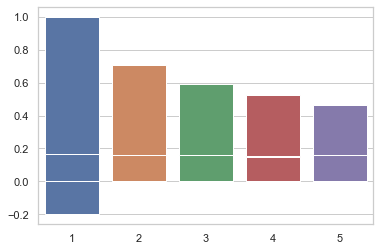

In [521]:
# Plot of the train-test accuracy for view of fitting and accuracy
sns.barplot(x=kList, y= knn_trainScore1, data=table_knn)
sns.barplot(x=kList, y= knn_testScore1, data=table_knn)
sns.barplot(x=kList, y= cv_knn, data=table_knn)
plt.show()

In [523]:
# Plot of the train-test accuracy for view of fitting and accuracy
#plt.plot(kList, knn_trainScore1, label="training accuracy") 
#plt.plot(kList, knn_testScore1, label="test accuracy")
#plt.plot(kList, cv_knn, label="CV accuracy")
#plt.ylabel("Accuracy")
#plt.xlabel("n_neighbors")
#plt.grid()
#plt.legend()
#plt.show()

In [469]:
# choose the best parameter with cross-validation
knn2 = KNeighborsRegressor(n_neighbors = 1)
knn2.fit(X_train1, y_train1)

cv_knn2 = cross_validate(knn2, x, y, cv=ShuffleSplit(n_splits=5, test_size=.2), scoring = 'r2', return_train_score=True)
knn2_train = np.mean(cv_knn2['train_score'])
knn2_test = np.mean(cv_knn2['test_score'])

print('Train Score',"{:.4%}".format(knn2_train))
print('Test Score',"{:.4%}".format(knn2_test))

Train Score 100.0000%
Test Score -10.6371%


#start timer
startTime = perf_counter()

knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train1,y_train1)

y_pred_knn_train1 = knn.predict(X_train1)
y_pred_knn_test1 = knn.predict(X_test1)

fullsmp_knn = knn.score(x, y)
print("Full sample R-squared:", fullsmp_knn)
print(" ")

knn_trainScore1 = knn.score(X_train1, y_train1)
knn_testScore1 = knn.score(X_test1, y_test1)
print("Train Score:", knn_trainScore)
print("Test Score:", knn_testScore)
print(" ")

mse_knn = mean_squared_error(y_test1, y_pred_knn_test1)
r2_knn = r2_score(y_test1, y_pred_knn_test1)
print('Mean squared error (MSE): %.4f' % mse_knn)
print('Coefficient of determination (R^2): %.4f' % r2_knn)
print(" ")

print('Train Set：')
regressionSummary(y_train1, y_pred_knn_train1)
print(" ")
print('Test Set：')
regressionSummary(y_test1, y_pred_knn_test1)

me_knn = round(np.mean(y_test1- y_pred_knn_test1), 4)
rmse_knn = round(np.sqrt(metrics.mean_squared_error(y_test1, y_pred_knn_test1)), 4)
mae_knn = round(metrics.mean_absolute_error(y_test1, y_pred_knn_test1), 4)

#regression_report(y_test, y_pred_knn_test)

#end timer
endTime = perf_counter()
time4 = endTime-startTime
print("Total time:", time4)

#### Random Forest

In [62]:
#start timer
startTime = perf_counter()

print("-------------------------------")
print("Random Forest Regression: ")
print("-------------------------------")

forest = RandomForestRegressor(random_state=42,verbose=False)
forest.fit(X_train1, y_train1)

y_pred_forest_train1 = forest.predict(X_train1)
y_pred_forest_test1 = forest.predict(X_test1)

fullsmp_forest = forest.score(x, y)
print("Full sample R-squared:", fullsmp_forest)
print(" ")

#forest_pca2 = RandomForestRegressor(random_state=42,verbose=False)

# set up dictionary for grid search
param_grid_forest1 = {'max_depth':[2,3,4,5,6,8,10,15,20], 
                      'max_features':[2,4,6], 
                      'n_estimators':[80,100,150,200,250,300,350]}
score_used = 'r2' 

# set up cross-validation shuffles
#shuffle_split_forest1 = ShuffleSplit(test_size=0.20, n_splits=25)

#Using cross validation
#cv_forest = cross_val_score(forest, x, y, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2')
#cv_forest = cross_val_score(forest, X_test1, y_test1, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2')
#print("Test Score(Cross Validation):", cv_forest)

# 5 Kold cross-validation & set up search
grid_search_forest1 = GridSearchCV(forest, param_grid_forest1, cv=5, scoring=score_used, return_train_score=True, n_jobs=1)
#grid_search_forest1 = GridSearchCV(forest, param_grid_forest1, cv=cv_forest, scoring=score_used, return_train_score=True, n_jobs=1)

# implement search
grid_search_forest1.fit(x, y)

# move results into DataFrame
table_forest = pd.DataFrame(grid_search_forest1.cv_results_)
display(table_forest)

#end timer
endTime = perf_counter()
time6 = endTime-startTime
print("Total time:", time6)

-------------------------------
Random Forest Regression: 
-------------------------------
Full sample R-squared: 0.982987566582641
 


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         3.008083      0.957975         0.153863        0.012777   
1         2.849776      0.104831         0.176537        0.024859   
2         3.925176      0.100074         0.221427        0.025966   
3         5.412175      0.199709         0.278945        0.038822   
4         6.783093      0.646273         0.308017        0.023741   
..             ...           ...              ...             ...   
184      47.173786      1.600004         1.278910        0.101736   
185      60.812492      1.232749         1.680283        0.126796   
186      77.332347      2.567712         2.324011        0.234726   
187      90.497410      1.727094         2.599273        0.187648   
188     106.222169      3.709234         3.264257        0.332394   

    param_max_depth param_max_features param_n_estimators  \
0                 2                  2                 80   
1                 2                  2                100   
2                 2                  2                150   
3                 2                  2                200   
4                 2                  2                250   
..              ...                ...                ...   
184              20                  6                150   
185              20                  6                200   
186              20                  6                250   
187              20                  6                300   
188              20                  6                350   

                                                        params  \
0      {'max_depth': 2, 'max_features': 2, 'n_estimators': 80}   
1     {'max_depth': 2, 'max_features': 2, 'n_estimators': 100}   
2     {'max_depth': 2, 'max_features': 2, 'n_estimators': 150}   
3     {'max_depth': 2, 'max_features': 2, 'n_estimators': 200}   
4     {'max_depth': 2, 'max_features': 2, 'n_estimators': 250}   
..                                                         ...   
184  {'max_depth': 20, 'max_features': 6, 'n_estimators': 150}   
185  {'max_depth': 20, 'max_features': 6, 'n_estimators': 200}   
186  {'max_depth': 20, 'max_features': 6, 'n_estimators': 250}   
187  {'max_depth': 20, 'max_features': 6, 'n_estimators': 300}   
188  {'max_depth': 20, 'max_features': 6, 'n_estimators': 350}   

     split0_test_score  split1_test_score  ...  mean_test_score  \
0             0.024046           0.010904  ...         0.014321   
1             0.025677           0.012219  ...         0.015495   
2             0.030012           0.014938  ...         0.020877   
3             0.032595           0.017169  ...         0.023250   
4             0.032265           0.016994  ...         0.023629   
..                 ...                ...  ...              ...   
184           0.507052           0.431288  ...         0.522758   
185           0.511572           0.429219  ...         0.523921   
186           0.515621           0.426322  ...         0.522337   
187           0.516635           0.426631  ...         0.523052   
188           0.518223           0.423116  ...         0.523015   

     std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0          0.014828              189            0.029104            0.033114   
1          0.014456              188            0.029820            0.033696   
2          0.012802              187            0.034984            0.037842   
3          0.013256              186            0.038394            0.041788   
4          0.012426              185            0.038501            0.042136   
..              ...              ...                 ...                 ...   
184        0.067829                5            0.631863            0.668248   
185        0.067522                2            0.635817            0.669090   
186        0.066586                6            0.637529            0.667915   
187        0.065962                3         

Total time: 23222.2666426


In [63]:
table_forest1 = table_forest[['param_max_depth', 'param_max_features', 'param_n_estimators', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
table_forest1.index += 1
table_forest1 = table_forest1.sort_values(["rank_test_score"], ascending=True)
display(table_forest1)

print('---- optimal parameters ----')
print(grid_search_forest1.best_params_)

print('---- best accuracy ----')
print(grid_search_forest1.best_score_)

param_max_depth param_max_features param_n_estimators  mean_train_score  \
184              20                  6                100          0.651016   
186              20                  6                200          0.652399   
188              20                  6                300          0.652161   
189              20                  6                350          0.651586   
185              20                  6                150          0.651123   
..              ...                ...                ...               ...   
5                 2                  2                250          0.040462   
4                 2                  2                200          0.040236   
3                 2                  2                150          0.037740   
2                 2                  2                100          0.032783   
1                 2                  2                 80          0.031779   

     mean_test_score  rank_test_score  
184         0.523995                1  
186         0.523921                2  
188         0.523052                3  
189         0.523015                4  
185         0.522758                5  
..               ...              ...  
5           0.023629              185  
4           0.023250              186  
3           0.020877              187  
2           0.015495              188  
1           0.014321              189  

[189 rows x 6 columns]

---- optimal parameters ----
{'max_depth': 20, 'max_features': 6, 'n_estimators': 100}
---- best accuracy ----
0.5239952838655642


In [64]:
mse_forest = mean_squared_error(y_test1, y_pred_forest_test1)
r2_forest = r2_score(y_test1, y_pred_forest_test1)
print('Mean squared error (MSE): %.4f' % mse_forest)
print('Coefficient of determination (R^2): %.4f' % r2_forest)
print(" ")
print('Train Set：')
regressionSummary(y_train1, y_pred_forest_train1)
print(" ")
print('Test Set：')
regressionSummary(y_test1, y_pred_forest_test1)

me_forest = round(np.mean(y_test1 - y_pred_forest_test1), 4)
rmse_forest = round(np.sqrt(metrics.mean_squared_error(y_test1, y_pred_forest_test1)), 4)
mae_forest = round(metrics.mean_absolute_error(y_test1, y_pred_forest_test1), 4)

Mean squared error (MSE): 28371112.9735
Coefficient of determination (R^2): 0.9456
 
Train Set：

Regression statistics

               Mean Error (ME) : -12.3132
Root Mean Squared Error (RMSE) : 1968.7348
     Mean Absolute Error (MAE) : 692.9291
 
Test Set：

Regression statistics

               Mean Error (ME) : -26.8338
Root Mean Squared Error (RMSE) : 5326.4541
     Mean Absolute Error (MAE) : 1890.7518


In [65]:
# choose the best parameter with cross-validation
forest2 = RandomForestRegressor(max_depth = 20, max_features = 6, n_estimators = 100, random_state=42)
forest2.fit(X_train1, y_train1)

cv_forest2 = cross_validate(forest2, x, y, cv=ShuffleSplit(n_splits=5, test_size=.2), scoring = 'r2', return_train_score=True)
forest2_train = np.mean(cv_forest2['train_score'])
forest2_test = np.mean(cv_forest2['test_score'])

print('Train Score',"{:.4%}".format(forest2_train))
print('Test Score',"{:.4%}".format(forest2_test))

Train Score 64.2067%
Test Score 62.8485%


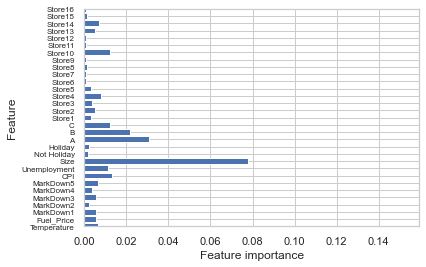

<Figure size 360000x648000 with 0 Axes>

In [266]:
#feature importance
def plot_feature_importances(model):
    n_features = x.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(0, 30, n_features)
    plt.tick_params(axis='y', labelsize=8) 
    #plt.yticks(rotation=-45)
    plt.rcParams['lines.linewidth']=500
    plt.plot(linewidth=5000)
    fig = plt.figure(figsize=(5000, 9000))
    plt.show()
    
plot_feature_importances(forest2)

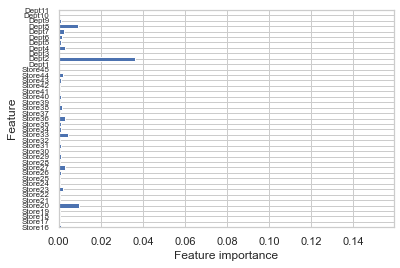

<Figure size 360000x648000 with 0 Axes>

In [263]:
#feature importance
def plot_feature_importances(model):
    n_features = x.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(30, 70, n_features)
    plt.tick_params(axis='y', labelsize=8) 
    #plt.yticks(rotation=-45)
    plt.rcParams['lines.linewidth']=500
    plt.plot(linewidth=5000)
    fig = plt.figure(figsize=(5000, 9000))
    plt.show()
    
plot_feature_importances(forest2)

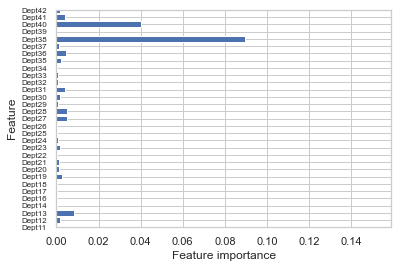

<Figure size 360000x648000 with 0 Axes>

In [264]:
#feature importance
def plot_feature_importances(model):
    n_features = x.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(70, 100, n_features)
    plt.tick_params(axis='y', labelsize=8) 
    #plt.yticks(rotation=-45)
    #plt.rcParams['lines.linewidth']=500
    #plt.plot(linewidth=5000)
    fig = plt.figure(figsize=(5000, 9000))
    plt.show()
    
plot_feature_importances(forest2)

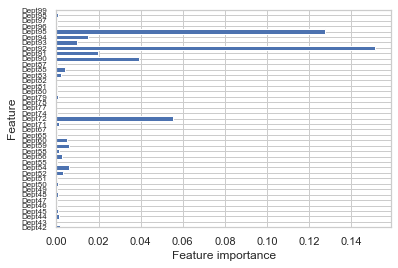

<Figure size 360000x648000 with 0 Axes>

In [265]:
#feature importance
def plot_feature_importances(model):
    n_features = x.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(100, 140, n_features)
    plt.tick_params(axis='y', labelsize=8) 
    #plt.yticks(rotation=-45)
    #plt.rcParams['lines.linewidth']=500
    #plt.plot(linewidth=5000)
    fig = plt.figure(figsize=(5000, 9000))
    plt.show()
    
plot_feature_importances(forest2)

## Modeling by using PCA

In [76]:
# x and y value using PCA
PCA_features = retailsPCA.columns
Xpca = retailsPCA[PCA_features].drop('Weekly_Sales', axis=1)
yPCA = retailsPCA["Weekly_Sales"]

In [77]:
#Split the data into 80% training and 20% testing
X_train2, X_test2, y_train2, y_test2 = train_test_split(Xpca, yPCA, test_size=0.2, random_state=42)

#### 1. Linear Regression model

In [78]:
#start timer
startTime = perf_counter()

lr_pca = LinearRegression()
lr_pca.fit(X_train2, y_train2)

print("-------------------------------")
print("Linear Regression(PCA): ")
print("-------------------------------")

fullsmp_lr_pca = lr_pca.score(Xpca, yPCA)
print("Full sample R-squared:", fullsmp_lr_pca)

y_pred_lr_train2 = lr_pca.predict(X_train2)
y_pred_lr_test2 = lr_pca.predict(X_test2)

lr_trainScore2 = lr_pca.score(X_train2, y_train2)
lr_testScore2 = lr_pca.score(X_test2, y_test2)
print("Train Score:", lr_trainScore2)
print("Test Score:", lr_testScore2)

#Using cross validation
cv_lr_pca = cross_val_score(lr_pca, Xpca, yPCA, cv=ShuffleSplit(n_splits=5, test_size=.2), scoring = 'r2').mean()
#cv_lr = cross_val_score(lr_pca, X_test, y_test, cv=ShuffleSplit(n_splits=50, test_size=.2), scoring = 'r2').mean()
print("Test Score(Cross Validation):", cv_lr_pca)
print(" ")

print('Coefficients:', lr_pca.coef_)
print('Intercept:', lr_pca.intercept_)
 
mse_lr_pca = mean_squared_error(y_test2, y_pred_lr_test2)
r2_lr_pca = adjusted_r2_score(y_test2, y_pred_lr_test2, lr_pca)
print('Mean squared error (MSE): %.4f' % mse_lr_pca)
print('Coefficient of determination (R^2): %.4f' % r2_lr_pca)
print(" ")

print('Train Set：')
regressionSummary(y_train2, y_pred_lr_train2)
print(" ")
print('Test Set：')
regressionSummary(y_test2, y_pred_lr_test2)

me_lr_pca = round(np.mean(y_test2 - y_pred_lr_test2), 4)
rmse_lr_pca = round(np.sqrt(metrics.mean_squared_error(y_test2, y_pred_lr_test2)), 4)
mae_lr_pca = round(metrics.mean_absolute_error(y_test2, y_pred_lr_test2), 4)

#end timer
endTime = perf_counter()
time8 = endTime-startTime
print("Total time:", time8)

-------------------------------
Linear Regression(PCA): 
-------------------------------
Full sample R-squared: 0.43300532519596935
Train Score: 0.43292405929833755
Test Score: 0.43332587715804727
Test Score(Cross Validation): 0.4301558204715584
 
Coefficients: [ 4660.57123127  -233.62128012   892.98019226   437.84223065
   128.29005939   581.60349304  1032.48136749  -524.73218609
   112.38829589  -335.3436352   -246.69654378  2465.88600889
  -100.15644691   843.01011159  -859.74795208   186.22267672
  -100.24084666  1047.27787911  2078.71385277   592.36765455
  -444.86646313 -1504.8717274    479.11106634 -1118.10722524
   144.43103998    41.10684354  1045.90542929  -801.24925336
  1258.8822693     24.2472457    381.44976624  1104.2968462
   640.68212821  -536.95053657  1203.77954731  -910.02152517
  1052.02012025   821.43840219   205.24536808   826.17942612
 -1421.00433901  -157.35113401 -1661.75528233 -2032.78210686
   -61.86925915  -231.66657037 -2149.19119545  2840.32142749
  5686.

In [79]:
# with cross-validation
lr_pca2 = LinearRegression()
lr_pca2.fit(X_train2, y_train2)

cv_lr_pca2 = cross_validate(lr_pca2, Xpca, yPCA, cv=ShuffleSplit(n_splits=5, test_size=.2), scoring = 'r2', return_train_score=True)
lr_pca2_train = np.mean(cv_lr_pca2['train_score'])
lr_pca2_test = np.mean(cv_lr_pca2['test_score'])

print('Train Score',"{:.4%}".format(lr_pca2_train))
print('Test Score',"{:.4%}".format(lr_pca2_test))

Train Score 43.3576%
Test Score 43.0747%


#### 2. Ridge Regression

In [80]:
#start timer
startTime = perf_counter()

#ridge_pca = Ridge(alpha=alpha_ridge)
#alpha_ridge = np.arange(start=0.05,stop=10.0,step=0.1)
#np.arange(start=0.5,stop=101,step=2.05)
#alpha_ridge = np.arange(start=0.5,stop=50.0,step=1)
#alpha_ridge = np.arange(start=0.5,stop=10,step=2)
alpha_ridge = np.arange(start=0.5,stop=30.0,step=6)
length_ridge2 = len(alpha_ridge)
ridge_trainScore2 = []
ridge_testScore2 = []
#training_score2 = []
#test_score2 = []
#coef2 = []

for i in range(length_ridge2):
    ridge_pca = Ridge(alpha=alpha_ridge[i])
    ridge_pca.fit(X_train2, y_train2)
    y_pred_ridge_train2 = ridge_pca.predict(X_train2)
    y_pred_ridge_test2 = ridge_pca.predict(X_test2)
    #Using cross validation
    cv_ridge_pca = cross_val_score(ridge_pca, Xpca, yPCA, cv=ShuffleSplit(n_splits=5, test_size=.2), scoring = 'r2')
    #cv_ridge_pca = cross_val_score(ridge_pca, X_test2, y_test2, cv=ShuffleSplit(n_splits=5, test_size=.2), scoring = 'r2')
    #ridge_trainScore = ridge_pca.score(X_train2, y_train2)
    #ridge_testScore = ridge_pca.score(X_test2, y_test2)
    
    #store train accuracy
    ridge_trainScore2.append(ridge_pca.score(X_train2, y_train2))
    #training_score2.append(np.mean(ridge_trainScore2))
    #store test accuracy
    ridge_testScore2.append(ridge_pca.score(X_test2, y_test2))
    #test_score2.append(np.mean(ridge_testScore2))
    #coef2.append(ridge_pca.coef_)


print("-------------------------------")
print("Ridge Regression(PCA): ")
print("-------------------------------")

fullsmp_ridge_pca = ridge_pca.score(Xpca, yPCA)
print("Full sample R-squared:", fullsmp_ridge_pca)
print(" ")

dataframe_ridge2 = {'Alpha': alpha_ridge,
                       'Train Set Score': ridge_trainScore2,
                       'Test Set Score': ridge_testScore2,
                       "Test Score(Cross Validation)" : cv_ridge_pca}
 
table_ridge_pca = pd.DataFrame(dataframe_ridge2)
table_ridge_pca.index += 1
table_ridge_pca = table_ridge_pca.sort_values(["Test Score(Cross Validation)","Test Set Score"], ascending=[False,False])
#table_ridge_pca = table_ridge_pca.sort_values("Test Set Score", ascending=False)
#table_ridge_pca = table_ridge_pca.sort_values(["Test Score(Cross Validation)"], ascending=False)
display(table_ridge_pca)

#ridge_trainScore2 = ridge_trainScore2.mean()
#ridge_testScore2 = ridge_testScore2.mean()

#print("Train Score:", ridge_trainScore2)
#print("Test Score:", ridge_testScore2)
print(" ")
print('Coefficients:', ridge_pca.coef_)
print('Intercept:', ridge_pca.intercept_)

mse_ridge_pca = mean_squared_error(y_test2, y_pred_ridge_test2)
r2_ridge_pca = adjusted_r2_score(y_test2, y_pred_ridge_test2, ridge_pca)
print('Mean squared error (MSE): %.4f' % mse_ridge_pca)
print('Coefficient of determination (R^2): %.4f' % r2_ridge_pca)
print(" ")

print('Train Set：')
regressionSummary(y_train2, y_pred_ridge_train2)
print(" ")
print('Test Set：')
regressionSummary(y_test2, y_pred_ridge_test2)

me_ridge_pca = round(np.mean(y_test2 - y_pred_ridge_test2), 4)
rmse_ridge_pca = round(np.sqrt(metrics.mean_squared_error(y_test2, y_pred_ridge_test2)), 4)
mae_ridge_pca = round(metrics.mean_absolute_error(y_test2, y_pred_ridge_test2), 4)

#end timer
endTime = perf_counter()
time9 = endTime-startTime
print("Total time:", time9)

-------------------------------
Ridge Regression(PCA): 
-------------------------------
Full sample R-squared: 0.4330052100303574
 


Alpha  Train Set Score  Test Set Score  Test Score(Cross Validation)
2    6.5         0.432924        0.433326                      0.436785
3   12.5         0.432924        0.433326                      0.433011
4   18.5         0.432924        0.433325                      0.431519
5   24.5         0.432924        0.433325                      0.427934
1    0.5         0.432924        0.433326                      0.427315

 
Coefficients: [ 4660.23130002  -233.60405927   892.91511981   437.80982823
   128.2810973    581.56198447  1032.40674221  -524.69403682
   112.37987977  -335.31936883  -246.67851046  2465.70821401
  -100.1486304    842.94892783  -859.68560132   186.20885278
  -100.23451553  1047.20122998  2078.56284098   592.32632379
  -444.83424194 -1504.76138977   479.07745252 -1118.02797368
   144.42110659    41.10545425  1045.82913305  -801.19060588
  1258.79090379    24.24486276   381.42290636  1104.21580217
   640.63528965  -536.91125604  1203.69269711  -909.95536565
  1051.94568914   821.37807316   205.22993002   826.11877422
 -1420.90201321  -157.33854158 -1661.63510452 -2032.63415511
   -61.86572924  -231.64965005 -2149.03595825  2840.11417828
  5686.20095912  -184.68194544   841.33089236  3609.05386225
  1179.4435192    927.57285292  1426.22371214   275.44969225
  1979.44122883 -2537.9131517   3474.84684776   913.93400914
   461.82529207  2350.05051949  2512.61713052 -1034.73564884
  4038.3

In [81]:
# choose the best parameter with cross-validation
ridge_pca2 = Ridge(alpha = 6.5)
ridge_pca2.fit(X_train2, y_train2)

cv_ridge_pca2 = cross_validate(ridge_pca2, Xpca, yPCA, cv=ShuffleSplit(n_splits=5, test_size=.2), scoring = 'r2', return_train_score=True)
ridge_pca2_train = np.mean(cv_ridge_pca2['train_score'])
ridge_pca2_test = np.mean(cv_ridge_pca2['test_score'])

print('Train Score',"{:.4%}".format(ridge_pca2_train))
print('Test Score',"{:.4%}".format(ridge_pca2_test))

Train Score 43.2800%
Test Score 43.3775%


#### 3. Lasso Regression

In [82]:
#start timer
startTime = perf_counter()

#lasso_pca = Lasso(alpha=alpha_lasso)
#alpha_lasso = np.arange(start=0.05,stop=50.0,step=1)
#alpha_lasso = np.arange(start=0.005,stop=10.0,step=0.5)
alpha_lasso = np.arange(start=0.0001, stop=0.0101, step=0.002)
length_lasso2 = len(alpha_lasso)
lasso_trainScore2 = []
lasso_testScore2 = []
#training_score2 = []
#test_score2 = []
#coef2 = []

for i in range(length_lasso2):
    lasso_pca = Lasso(alpha=alpha_lasso[i])
    lasso_pca.fit(X_train2, y_train2)
    y_pred_lasso_train2 = lasso_pca.predict(X_train2)
    y_pred_lasso_test2 = lasso_pca.predict(X_test2)
    #Using cross validation
    cv_lasso_pca = cross_val_score(lasso_pca, Xpca, yPCA, cv=ShuffleSplit(n_splits=5, test_size=.2), scoring = 'r2')
    #cv_lasso_pca = cross_val_score(lasso_pca, X_test2, y_test2, cv=ShuffleSplit(n_splits=10, test_size=.2), scoring = 'r2')
    
    #lasso_trainScore2 = lasso_pca.score(X_train2, y_train2)
    #lasso_testScore2 = lasso_pca.score(X_test2, y_test2)
    
    #store train accuracy
    lasso_trainScore2.append(lasso_pca.score(X_train2, y_train2))
    #training_score2.append(np.mean(ridge_trainScore))
    #store test accuracy
    lasso_testScore2.append(lasso_pca.score(X_test2, y_test2))
    #test_score2.append(np.mean(ridge_testScore2))
    #coef2.append(ridge_pca.coef_)


print("-------------------------------")
print("Lasso Regression(PCA): ")
print("-------------------------------")

fullsmp_lasso_pca = lasso_pca.score(Xpca, yPCA)
print("Full sample R-squared:", fullsmp_lasso_pca)
print(" ")

dataframe_lasso2 = {'Alpha': alpha_lasso,
                       'Train Set Score': lasso_trainScore2,
                       'Test Set Score': lasso_testScore2,
                       "Test Score(Cross Validation)" : cv_lasso_pca}
 
table_lasso_pca = pd.DataFrame(dataframe_lasso2)
table_lasso_pca.index += 1
table_lasso_pca = table_lasso_pca.sort_values(["Test Score(Cross Validation)","Test Set Score"], ascending=[False,False])
#table_lasso_pca = table_lasso_pca.sort_values("Test Set Score", ascending=False)
#table_lasso_pca = table_lasso_pca.sort_values(["Test Score(Cross Validation)"], ascending=False)
display(table_lasso_pca)

#lasso_trainScore2 = lasso_trainScore2.mean()
#lasso_testScore2 = lasso_testScore2.mean()
#print("Train Score:", lasso_trainScore2)
#print("Test Score:", lasso_testScore2)
print(" ")

print('Coefficients:', lasso_pca.coef_)
print('Intercept:', lasso_pca.intercept_)

mse_lasso_pca = mean_squared_error(y_test2, y_pred_lasso_test2)
r2_lasso_pca = adjusted_r2_score(y_test2, y_pred_lasso_test2, lasso_pca)
print('Mean squared error (MSE): %.4f' % mse_lasso_pca)
print('Coefficient of determination (R^2): %.4f' % r2_lasso_pca)
print(" ")

print('Train Set：')
regressionSummary(y_train2, y_pred_lasso_train2)
print(" ")
print('Test Set：')
regressionSummary(y_test2, y_pred_lasso_test2)

me_lasso_pca = round(np.mean(y_test2 - y_pred_lasso_test2), 4)
rmse_lasso_pca = round(np.sqrt(metrics.mean_squared_error(y_test2, y_pred_lasso_test2)), 4)
mae_lasso_pca = round(metrics.mean_absolute_error(y_test2, y_pred_lasso_test2), 4)

#end timer
endTime = perf_counter()
time10 = endTime-startTime
print("Total time:", time10)

-------------------------------
Lasso Regression(PCA): 
-------------------------------
Full sample R-squared: 0.43300531805842657
 


Alpha  Train Set Score  Test Set Score  Test Score(Cross Validation)
1  0.0001         0.432924        0.433326                      0.439044
3  0.0041         0.432924        0.433326                      0.437044
2  0.0021         0.432924        0.433326                      0.436035
5  0.0081         0.432924        0.433326                      0.434191
4  0.0061         0.432924        0.433326                      0.427189

 
Coefficients: [ 4660.56303374  -233.61320649   892.97208742   437.83408321
   128.28197802   581.59542989  1032.47327393  -524.72411528
   112.3802222   -335.3354875   -246.68839936  2465.87800747
  -100.14837831   843.00206751  -859.73980607   186.21451218
  -100.2327895   1047.26974847  2078.70576686   592.35961313
  -444.85831804 -1504.86366822   479.10307566 -1118.09921426
   144.42286924    41.09884494  1045.89738359  -801.24111929
  1258.87414908    24.23914854   381.44165433  1104.28867852
   640.6740249   -536.94236423  1203.77144713  -910.01339683
  1052.0121155    821.43025939   205.23723817   826.17132538
 -1420.99621826  -157.34296353 -1661.74718949 -2032.77397035
   -61.86122422  -231.65849941 -2149.1830672   2840.31337247
  5686.60418478  -184.68898948   841.38484575  3609.30768318
  1179.52081414   927.63142953  1426.31915343   275.46173685
  1979.57627168 -2538.08966521  3475.09088877   913.99166831
   461.85025179  2350.21459003  2512.79304648 -1034.80216596
  4038.6

In [83]:
# choose the best parameter with cross-validation
lasso_pca2 = Lasso(alpha = 0.0001)
lasso_pca2.fit(X_train2, y_train2)

cv_lasso_pca2 = cross_validate(lasso_pca2, Xpca, yPCA, cv=ShuffleSplit(n_splits=5, test_size=.2), scoring = 'r2', return_train_score=True)
lasso_pca2_train = np.mean(cv_lasso_pca2['train_score'])
lasso_pca2_test = np.mean(cv_lasso_pca2['test_score'])

print('Train Score',"{:.4%}".format(lasso_pca2_train))
print('Test Score',"{:.4%}".format(lasso_pca2_test))

Train Score 43.2892%
Test Score 43.3227%


#### KNN

In [ ]:
#start timer
startTime = perf_counter()

#knn_pca = KNeighborsRegressor(n_neighbors=10).fit(X_train, y_train)
#nmc = 100
#shuffle = ShuffleSplit(n_splits = nmc)

kList = np.arange(start=1, stop=6, step=1)
knn_trainScore2 = []
knn_testScore2 = []
cv_knnlst2 = []
#training_accuracy2 = []
#test_accuracy2 = []

for k in kList:
    knn_pca = KNeighborsRegressor(n_neighbors=k)
    knn_pca.fit(X_train2,y_train2)
    y_pred_knn_train2 = knn_pca.predict(X_train2)
    y_pred_knn_test2 = knn_pca.predict(X_test2)
    #Using cross validation
    cv_knn_pca = cross_val_score(knn_pca, Xpca, yPCA, cv=ShuffleSplit(n_splits=5, test_size=0.20), scoring = 'r2')
    #cv_knn_pca = cross_val_score(knn_pca, X_test, y_test, cv=ShuffleSplit(n_splits=100, test_size=0.20), scoring = 'r2')
    cv_knnlst2.append(cv_knn_pca)
    #knn_trainScore2 = knn_pca.score(X_train2, y_train2)
    #knn_testScore2 = knn_pca.score(X_test2, y_test2)
    
    # record train accuracy
    knn_trainScore2.append(knn_pca.score(X_train2, y_train2))
    #training_accuracy.append(knn_trainScore)
    # record test accuracy
    knn_testScore2.append(knn_pca.score(X_test2, y_test2))
    #test_accuracy.append(knn_testScore)

print("-------------------------------")
print("K Nearest Neighbors Regression: ")
print("-------------------------------")

fullsmp_knn_pca = knn_pca.score(Xpca, yPCA)
print("Full sample R-squared:", fullsmp_knn_pca)

#Using cross validation
#print("Test Score(Cross Validation):", cv_knn_pca)
print(" ")

dataframe_knn2 = {'Neighbor Sizes': kList,
             'Train Set Score': knn_trainScore2,
             'Test Set Score': knn_testScore2,
              "Test Score(Cross Validation)": cv_knn_pca}
 
table_knn_pca = pd.DataFrame(dataframe_knn2)
table_knn_pca = table_knn_pca.set_index('Neighbor Sizes')
#table_knn_pca = table_knn_pca.sort_values(["Test Score(Cross Validation)","Test Set Score"], ascending=[False,False])
#table_knn_pca = table_knn_pca.sort_values("Test Set Score", ascending=False)
table_knn_pca = table_knn_pca.sort_values(["Test Score(Cross Validation)"], ascending=False)
display(table_knn_pca)

#knn_trainScore2 = knn_trainScore2.mean()
#knn_testScore2 = knn_testScore2.mean()
#print("Train Score:", knn_trainScore2)
#print("Test Score:", knn_testScore2)
print(" ")

mse_knn_pca = mean_squared_error(y_test2, y_pred_knn_test2)
r2_knn_pca = r2_score(y_test2, y_pred_knn_test2)
print('Mean squared error (MSE): %.4f' % mse_knn_pca)
print('Coefficient of determination (R^2): %.4f' % r2_knn_pca)
print(" ")

print('Train Set：')
regressionSummary(y_train2, y_pred_knn_train2)
print(" ")
print('Test Set：')
regressionSummary(y_test2, y_pred_knn_test2)

me_knn_pca = round(np.mean(y_test2 - y_pred_knn_test2), 4)
rmse_knn_pca = round(np.sqrt(metrics.mean_squared_error(y_test2, y_pred_knn_test2)), 4)
mae_knn_pca = round(metrics.mean_absolute_error(y_test2, y_pred_knn_test2), 4)

#regression_report(y_test2, y_pred_knn_test2)

#end timer
endTime = perf_counter()
time12 = endTime-startTime
print("Total time:", time12)

In [ ]:
# Plot of the train-test accuracy for view of fitting and accuracy
plt.plot(kList, knn_trainScore2, label="training accuracy") 
plt.plot(kList, knn_testScore2, label="test accuracy")
plt.plot(kList, cv_knn_pca, label="CV accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.grid()
plt.legend()
plt.show()

#start timer
startTime = perf_counter()

print("-------------------------------")
print("K Nearest Neighbors Regression: ")
print("-------------------------------")

forest_pca = RandomForestRegressor(random_state=42).fit(X_train2, y_train2)

print("Full sample R-squared:")
print(tree_pca.score(Xpca, yPCA))

#Using cross validation
cv_forest_pca = cross_val_score(forest_pca2, Xpca, yPCA, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2').mean()
#cv_forest_pca = cross_val_score(forest_pca2, X_test2, y_test2, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2').mean()
print("Test Score(Cross Validation):", cv_forest_pca)

forest_trainScore2 = forest_pca.score(X_train2, y_train2)
forest_testScore2 = forest_pca.score(X_test2, y_test2)
print("Train Score:", forest_trainScore2)
print("Test Score:", forest_testScore2)
print(" ")

y_pred_forest_train2 = forest_pca.predict(X_train2)
y_pred_forest_test2 = forest_pca.predict(X_test2)
print(" ")

print('Train Set：')
regressionSummary(y_train2, y_pred_forest_train2)
print(" ")
print('Test Set：')
regressionSummary(y_test2, y_pred_forest_test2)

me_forest_pca = round(np.mean(y_test2 - y_pred_forest_test2), 4)
rmse_forest_pca = round(np.sqrt(metrics.mean_squared_error(y_test2, y_pred_forest_test2)), 4)
mae_forest_pca = round(metrics.mean_absolute_error(y_test2, y_pred_forest_test2), 4)

#end timer
endTime = perf_counter()
time13 = endTime-startTime
print("Total time:", time12)

#### Random Forest

In [84]:
#start timer
startTime = perf_counter()

print("-------------------------------")
print("Random Forest Regression(PCA): ")
print("-------------------------------")

forest_pca = RandomForestRegressor(random_state=42,verbose=False)
forest_pca.fit(X_train2, y_train2)

y_pred_forest_train2 = forest_pca.predict(X_train2)
y_pred_forest_test2 = forest_pca.predict(X_test2)

fullsmp_forest_pca = forest_pca.score(Xpca, yPCA)
print("Full sample R-squared:", fullsmp_forest_pca)
print(" ")

#forest_pca2 = RandomForestRegressor(random_state=42,verbose=False)

# set up dictionary for grid search
param_grid_forest2 = {'max_depth':[2,3,4,5,6,8,10,15,20], 
                      'max_features':[1,2], 
                      'n_estimators':[80,100,150,200,250,300,350]}
score_used = 'r2' 

# set up cross-validation shuffles
#shuffle_split_forest2 = ShuffleSplit(test_size=0.20, n_splits=25)

#Using cross validation
#cv_forest_pca = cross_val_score(forest_pca, Xpca, yPCA, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2')
#cv_forest_pca = cross_val_score(forest_pca, X_test2, y_test2, cv=ShuffleSplit(n_splits=100, test_size=.2), scoring = 'r2')
#print("Test Score(Cross Validation):", cv_forest_pca)

# 5 Kold cross-validation & set up search
grid_search_forest2 = GridSearchCV(forest_pca, param_grid_forest2, cv=5, scoring=score_used, return_train_score=True, n_jobs=1)
#grid_search_forest2 = GridSearchCV(forest_pca, param_grid_forest2, cv=cv_forest_pca, scoring=score_used, return_train_score=True, n_jobs=1)

# implement search
grid_search_forest2.fit(Xpca, yPCA)

# move results into DataFrame
table_forest_pca = pd.DataFrame(grid_search_forest2.cv_results_)
display(table_forest_pca)

#end timer
endTime = perf_counter()
time11 = endTime-startTime
print("Total time:", time11)

-------------------------------
Random Forest Regression(PCA): 
-------------------------------
Full sample R-squared: 0.9743691462465632
 


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         6.729807      1.001861         0.116126        0.007449   
1         7.501667      0.324594         0.136673        0.017074   
2        11.101093      0.229454         0.184497        0.013396   
3        14.770716      0.295330         0.251097        0.063250   
4        18.558567      0.287369         0.271214        0.007016   
..             ...           ...              ...             ...   
121     142.015903      0.772337         1.428263        0.073101   
122     189.657055      1.158326         2.028707        0.084005   
123     237.244317      1.712550         2.422219        0.125480   
124     262.474030     19.482128         2.693186        0.163704   
125     334.624711      8.193035         3.672382        0.597759   

    param_max_depth param_max_features param_n_estimators  \
0                 2                  1                 80   
1                 2                  1                100   
2                 2                  1                150   
3                 2                  1                200   
4                 2                  1                250   
..              ...                ...                ...   
121              20                  2                150   
122              20                  2                200   
123              20                  2                250   
124              20                  2                300   
125              20                  2                350   

                                                        params  \
0      {'max_depth': 2, 'max_features': 1, 'n_estimators': 80}   
1     {'max_depth': 2, 'max_features': 1, 'n_estimators': 100}   
2     {'max_depth': 2, 'max_features': 1, 'n_estimators': 150}   
3     {'max_depth': 2, 'max_features': 1, 'n_estimators': 200}   
4     {'max_depth': 2, 'max_features': 1, 'n_estimators': 250}   
..                                                         ...   
121  {'max_depth': 20, 'max_features': 2, 'n_estimators': 150}   
122  {'max_depth': 20, 'max_features': 2, 'n_estimators': 200}   
123  {'max_depth': 20, 'max_features': 2, 'n_estimators': 250}   
124  {'max_depth': 20, 'max_features': 2, 'n_estimators': 300}   
125  {'max_depth': 20, 'max_features': 2, 'n_estimators': 350}   

     split0_test_score  split1_test_score  ...  mean_test_score  \
0             0.062824           0.039525  ...         0.056822   
1             0.061132           0.039008  ...         0.057449   
2             0.061158           0.039963  ...         0.058150   
3             0.062695           0.042796  ...         0.059432   
4             0.063006           0.042692  ...         0.059703   
..                 ...                ...  ...              ...   
121           0.517450           0.444789  ...         0.479163   
122           0.521596           0.447688  ...         0.480319   
123           0.525108           0.454924  ...         0.484410   
124           0.525338           0.454495  ...         0.483858   
125           0.527058           0.454499  ...         0.484394   

     std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0          0.013376              126            0.079514            0.084049   
1          0.013026              125            0.078884            0.080067   
2          0.012940              124            0.080775            0.083000   
3          0.013132              123            0.081471            0.086131   
4          0.013668              122            0.082484            0.086568   
..              ...              ...                 ...                 ...   
121        0.106462               24            0.967391            0.972194   
122        0.106997               23            0.967876            0.972329   
123        0.104762               16            0.968025            0.972224   
124        0.104214               18         

Total time: 50809.38258209999


In [85]:
table_forest_pca1 = table_forest_pca[['param_max_depth', 'param_max_features', 'param_n_estimators', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
table_forest_pca1.index += 1
table_forest_pca1 = table_forest_pca1.sort_values(["rank_test_score"], ascending=True)
display(table_forest_pca1)

print('---- optimal parameters ----')
print(grid_search_forest2.best_params_)

print('---- best accuracy ----')
print(grid_search_forest2.best_score_)

param_max_depth param_max_features param_n_estimators  mean_train_score  \
112              15                  2                350          0.925851   
110              15                  2                250          0.925834   
111              15                  2                300          0.926218   
108              15                  2                150          0.924885   
107              15                  2                100          0.924630   
..              ...                ...                ...               ...   
5                 2                  1                250          0.085713   
4                 2                  1                200          0.085643   
3                 2                  1                150          0.084597   
2                 2                  1                100          0.083874   
1                 2                  1                 80          0.084139   

     mean_test_score  rank_test_score  
112         0.516962                1  
110         0.516235                2  
111         0.515990                3  
108         0.511048                4  
107         0.510570                5  
..               ...              ...  
5           0.059703              122  
4           0.059432              123  
3           0.058150              124  
2           0.057449              125  
1           0.056822              126  

[126 rows x 6 columns]

---- optimal parameters ----
{'max_depth': 15, 'max_features': 2, 'n_estimators': 350}
---- best accuracy ----
0.516961950902005


In [86]:
mse_forest_pca = mean_squared_error(y_test2, y_pred_forest_test2)
r2_forest_pca = r2_score(y_test2, y_pred_forest_test2)
print('Mean squared error (MSE): %.4f' % mse_forest_pca)
print('Coefficient of determination (R^2): %.4f' % r2_forest_pca)
print(" ")
print('Train Set：')
regressionSummary(y_train2, y_pred_forest_train2)
print(" ")
print('Test Set：')
regressionSummary(y_test2, y_pred_forest_test2)

me_forest_pca = round(np.mean(y_test2 - y_pred_forest_test2), 4)
rmse_forest_pca = round(np.sqrt(metrics.mean_squared_error(y_test2, y_pred_forest_test2)), 4)
mae_forest_pca = round(metrics.mean_absolute_error(y_test2, y_pred_forest_test2), 4)

Mean squared error (MSE): 43696406.0081
Coefficient of determination (R^2): 0.9162
 
Train Set：

Regression statistics

               Mean Error (ME) : -57.5030
Root Mean Squared Error (RMSE) : 2366.7031
     Mean Absolute Error (MAE) : 836.9661
 
Test Set：

Regression statistics

               Mean Error (ME) : -154.3256
Root Mean Squared Error (RMSE) : 6610.3257
     Mean Absolute Error (MAE) : 2292.8656


In [88]:
# choose the best parameter with cross-validation
forest_pca2 = RandomForestRegressor(max_depth = 15, max_features = 2, n_estimators = 350, random_state=42)
forest_pca2.fit(X_train2, y_train2)

cv_forest_pca2 = cross_validate(forest_pca2, Xpca, yPCA, cv=ShuffleSplit(n_splits=5, test_size=.2), scoring = 'r2', return_train_score=True)
forest_pca2_train = np.mean(cv_forest_pca2['train_score'])
forest_pca2_test = np.mean(cv_forest_pca2['test_score'])

print('Train Score',"{:.4%}".format(forest_pca2_train))
print('Test Score',"{:.4%}".format(forest_pca2_test))

Train Score 91.6647%
Test Score 88.7233%


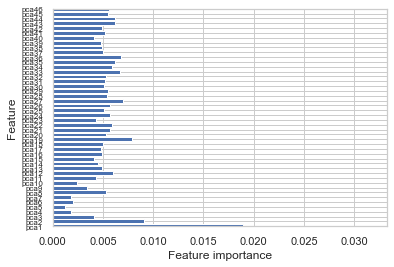

<Figure size 360000x648000 with 0 Axes>

In [252]:
#feature importance
def plot_feature_importances(model):
    n_features = Xpca.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), Xpca.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(0, 45, n_features)
    plt.tick_params(axis='y', labelsize=8) 
    #plt.yticks(rotation=-45)
    plt.rcParams['lines.linewidth']=500
    plt.plot(linewidth=5000)
    fig = plt.figure(figsize=(5000, 9000))
    plt.show()
    
plot_feature_importances(forest_pca2)

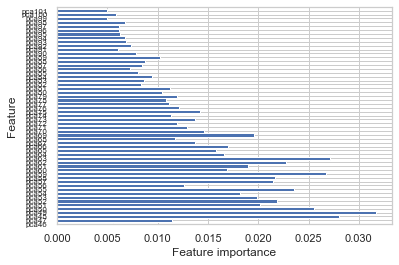

<Figure size 360000x648000 with 0 Axes>

In [254]:
#feature importance
def plot_feature_importances(model):
    n_features = Xpca.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), Xpca.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(45, 101, n_features)
    plt.tick_params(axis='y', labelsize=8) 
    #plt.yticks(rotation=-45)
    #plt.rcParams['lines.linewidth']=5000
    #plt.plot(linewidth=50000)
    fig = plt.figure(figsize=(5000, 9000))
    plt.show()
    
plot_feature_importances(forest_pca2)

In [ ]:
dataframe = {'Full sample R-squared': [fullsmp_lr, fullsmp_ridge, fullsmp_lasso, 'fullsmp_knn', fullsmp_forest, 
                                       fullsmp_lr_pca, fullsmp_ridge_pca, fullsmp_lasso_pca, 'fullsmp_knn_pca', fullsmp_forest_pca],
             'Train Score': [lr_trainScore1, table_ridge.iloc[0,1], table_lasso.iloc[0,1], 'table_knn.iloc[0,0]', table_forest1.iloc[0,3], 
                            lr_trainScore2, table_ridge_pca.iloc[0,1], table_lasso_pca.iloc[0,1], 'table_knn_pca.iloc[0,0]', table_forest_pca1.iloc[0,3]],
             
            'Test Score': [lr_testScore1, table_ridge.iloc[0,2], table_lasso.iloc[0,2], 'table_knn.iloc[0,1]', table_forest1.iloc[0,4],
                           lr_testScore2, table_ridge_pca.iloc[0,2], table_lasso_pca.iloc[0,2], 'table_knn_pca.iloc[0,1]', table_forest_pca1.iloc[0,4]],
             
             'Test Score(CV)': [cv_lr, table_ridge.iloc[0,3], table_lasso.iloc[0,3], 'table_knn.iloc[0,2]', 'N/A',
                                cv_lr_pca, table_ridge_pca.iloc[0,3], table_lasso_pca.iloc[0,3], 'table_knn_pca.iloc[0,2]', 'N/A'],
             'Coefficient of determination(R^2)': [r2_lr, r2_ridge, r2_lasso, 'r2_knn', r2_forest,
                                                   r2_lr_pca, r2_ridge_pca, r2_lasso_pca, 'r2_knn_pca', r2_forest_pca],
             'Test MSE': [mse_lr, mse_ridge, mse_lasso, 'mse_knn', mse_forest,
                          mse_lr_pca, mse_ridge_pca, mse_lasso_pca, 'mse_knn_pca', mse_forest_pca],
             'Test ME': [me_lr, me_ridge, me_lasso, 'me_knn', me_forest,
                         me_lr_pca, me_ridge_pca, me_lasso_pca, 'me_knn_pca', me_forest_pca],
             'Test RMSE': [rmse_lr, rmse_ridge, rmse_lasso, 'rmse_knn', rmse_forest,
                           rmse_lr_pca, rmse_ridge_pca, rmse_lasso_pca, 'rmse_knn_pca', rmse_forest_pca],
             'Test MAE': [mae_lr, mae_ridge, mae_lasso, 'mae_knn', mae_forest,
                          mae_lr_pca, mae_ridge_pca, mae_lasso_pca, 'mae_knn_pca', mae_forest_pca],
             'Time': [time1, time2, time3, 'time4', time6, time8, time9, time10, time11, 'time12']}

table = pd.DataFrame(dataframe, index = ["Linear Regression", "Ridge Regression", "Lasso Regression", 
                                         "KNeighbors Regression","Random Forest Regression", 
                                         "Linear Regression(PCA)", "Ridge Regression(PCA)", "Lasso Regression(PCA)", 
                                         "KNeighbors Regression(PCA)", "Random Forest Regression(PCA)"])
table = table.rename_axis(['Models'])
table = table.reset_index()
table.index += 1
display(table)

In [524]:
dataframe = {'Full sample R-squared': [fullsmp_lr, fullsmp_ridge, fullsmp_lasso, fullsmp_knn, fullsmp_forest, 
                                       fullsmp_lr_pca, fullsmp_ridge_pca, fullsmp_lasso_pca, fullsmp_forest_pca],
             'Train Score': [lr_trainScore1, table_ridge.iloc[0,1], table_lasso.iloc[0,1], table_knn.iloc[1,0], table_forest1.iloc[0,3], 
                            lr_trainScore2, table_ridge_pca.iloc[0,1], table_lasso_pca.iloc[0,1], table_forest_pca1.iloc[0,3]],
             
            'Test Score': [lr_testScore1, table_ridge.iloc[0,2], table_lasso.iloc[0,2], table_knn.iloc[1,1], table_forest1.iloc[0,4],
                           lr_testScore2, table_ridge_pca.iloc[0,2], table_lasso_pca.iloc[0,2], table_forest_pca1.iloc[0,4]],
             
             'Test Score(CV)': [cv_lr, table_ridge.iloc[0,3], table_lasso.iloc[0,3], table_knn.iloc[1,2], 'N/A',
                                cv_lr_pca, table_ridge_pca.iloc[0,3], table_lasso_pca.iloc[0,3], 'N/A'],
             'Coefficient of determination(R^2)': [r2_lr, r2_ridge, r2_lasso, r2_knn, r2_forest,
                                                   r2_lr_pca, r2_ridge_pca, r2_lasso_pca, r2_forest_pca],
             'Test MSE': [mse_lr, mse_ridge, mse_lasso, mse_knn, mse_forest,
                          mse_lr_pca, mse_ridge_pca, mse_lasso_pca, mse_forest_pca],
             'Test ME': [me_lr, me_ridge, me_lasso, me_knn, me_forest,
                         me_lr_pca, me_ridge_pca, me_lasso_pca, me_forest_pca],
             'Test RMSE': [rmse_lr, rmse_ridge, rmse_lasso, rmse_knn, rmse_forest,
                           rmse_lr_pca, rmse_ridge_pca, rmse_lasso_pca, rmse_forest_pca],
             'Test MAE': [mae_lr, mae_ridge, mae_lasso, mae_knn, mae_forest,
                          mae_lr_pca, mae_ridge_pca, mae_lasso_pca, mae_forest_pca],
             'Time': [time1, time2, time3, time4, time6, time8, time9, time10, time11]}

table = pd.DataFrame(dataframe, index = ["Linear Regression", "Ridge Regression", "Lasso Regression", "KNeighbors Regression", "Random Forest Regression", 
                                         "Linear Regression(PCA)", "Ridge Regression(PCA)", "Lasso Regression(PCA)", 
                                         "Random Forest Regression(PCA)"])
table = table.rename_axis(['Models'])
table = table.reset_index()
table.index += 1
display(table)

Models  Full sample R-squared  Train Score  \
1              Linear Regression               0.657876     0.658101   
2               Ridge Regression               0.657793     0.658047   
3               Lasso Regression               0.657876     0.658101   
4          KNeighbors Regression               0.402077     0.464691   
5       Random Forest Regression               0.982988     0.651016   
6         Linear Regression(PCA)               0.433005     0.432924   
7          Ridge Regression(PCA)               0.433005     0.432924   
8          Lasso Regression(PCA)               0.433005     0.432924   
9  Random Forest Regression(PCA)               0.974369     0.925851   

   Test Score Test Score(CV)  Coefficient of determination(R^2)      Test MSE  \
1    0.656986       0.650838                           0.656411  1.788718e+08   
2    0.656925       0.667297                           0.656320  1.789197e+08   
3    0.656986       0.661921                           0.656412  1.788716e+08   
4    0.155563        0.16294                           0.155563  4.403493e+08   
5    0.523995            N/A                           0.945594  2.837111e+07   
6    0.433326       0.430156                           0.432646  2.955041e+08   
7    0.433326       0.436785                           0.432646  2.955044e+08   
8    0.433326       0.439044                           0.432646  2.955041e+08   
9    0.516962            N/A                           0.916205  4.369641e+07   

    Test ME   Test RMSE    Test MAE          Time  
1   31.5464  13374.2966   8164.9902     18.855679  
2   31.5572  13376.0855   8156.8053     43.387972  
3   31.5622  13374.2887   8164.8695   2604.687244  
4  -13.5805  20984.5023  13012.4208  49379.338378  
5  -26.8338   5326.4541   1890.7518  23222.266643  
6   84.7301  17190.2332  11577.7605     13.855897  
7   84.7246  17190.2417  11577.5911     31.184158  
8   84.7298  17190.2337  11577.7549     40.544677  
9 -154.3256   6610.3257   2292.8656  50809.382582

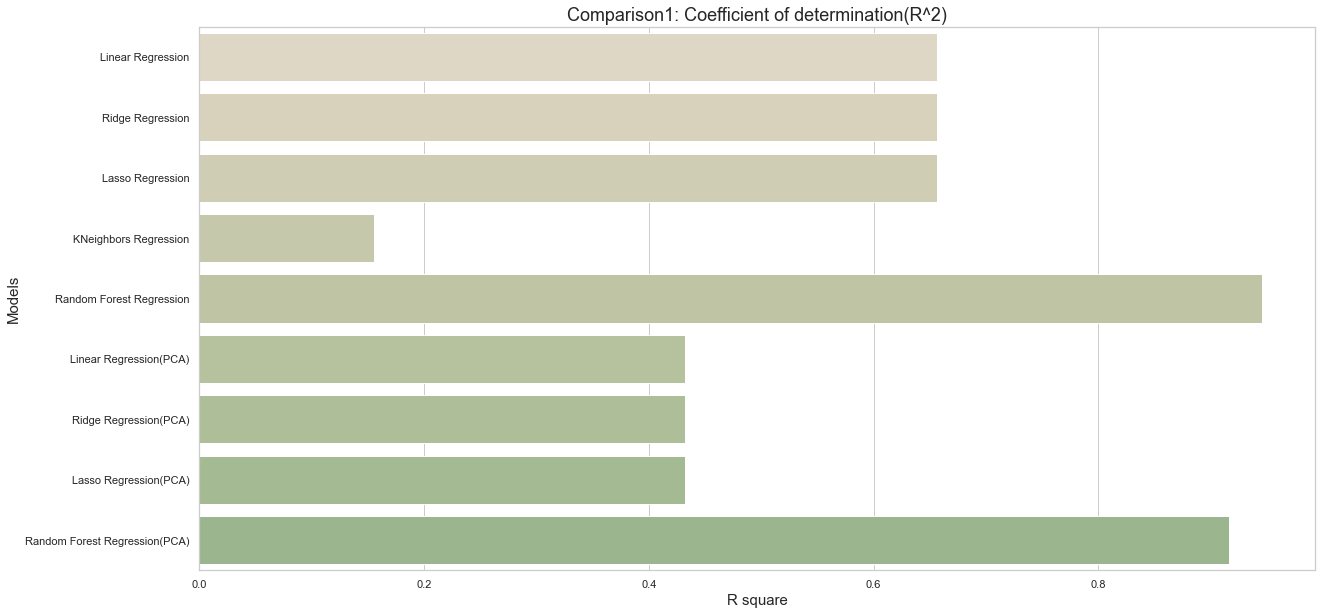

In [525]:
#make a plot
figure = plt.figure(figsize=(20,10))
sns.barplot(x = 'Coefficient of determination(R^2)', y= 'Models', data=table, palette = sns.cubehelix_palette(len('Coefficient of determination(R^2)'), start=.5, rot=-.85))
plt.xlabel("R square", fontsize = 15)
plt.ylabel("Models", fontsize = 15)
plt.title("Comparison1: Coefficient of determination(R^2)", fontsize = 18)
plt.show()

In [ ]:
dataframe2 = {'Train Set Mean Score': [lr2_train, ridge2_train, lasso2_train, knn2_train, forest2_train, 
                                      lr_pca2_train, ridge_pca2_train, lasso_pca2_train, knn_pca2_train, forest_pca2_train],
              
             'Test Set Mean Score': [lr2_test, ridge2_test, lasso2_test, knn2_test, forest2_test,  
                                     lr_pca2_test, ridge_pca2_test, lasso_pca2_test, knn_pca2_test, forest_pca2_test] 
            }

table2 = pd.DataFrame(dataframe2, index = ["Linear Regression", "Ridge Regression", "Lasso Regression", 
                                         "KNeighbors Regression", "Random Forest Regression",
                                         "Linear Regression(PCA)", "Ridge Regression(PCA)", "Lasso Regression(PCA)", 
                                         "KNeighbors Regression(PCA)", "Random Forest Regression(PCA)"])
table2 = table2.rename_axis(['Models'])
table2 = table2.reset_index()
table2.index += 1
#table = table.sort_values('Test Set Mean Score', ascending=False)
display(table2)

In [526]:
dataframe2 = {'Train Set Mean Score': [lr2_train, ridge2_train, lasso2_train, knn2_train, forest2_train, 
                                      lr_pca2_train, ridge_pca2_train, lasso_pca2_train, forest_pca2_train],
              
             'Test Set Mean Score': [lr2_test, ridge2_test, lasso2_test, knn2_test, forest2_test,  
                                     lr_pca2_test, ridge_pca2_test, lasso_pca2_test, forest_pca2_test] 
            }

table2 = pd.DataFrame(dataframe2, index = ["Linear Regression", "Ridge Regression", "Lasso Regression", "KNeighbors Regression", 
                                           "Random Forest Regression", "Linear Regression(PCA)", "Ridge Regression(PCA)",
                                           "Lasso Regression(PCA)", "Random Forest Regression(PCA)"])
table2 = table2.rename_axis(['Models'])
table2 = table2.reset_index()
table2.index += 1
#table = table.sort_values('Test Set Mean Score', ascending=False)
display(table2)

Models  Train Set Mean Score  Test Set Mean Score
1              Linear Regression              0.657597             0.658999
2               Ridge Regression              0.656736             0.662235
3               Lasso Regression              0.657462             0.659567
4          KNeighbors Regression              1.000000            -0.106371
5       Random Forest Regression              0.642067             0.628485
6         Linear Regression(PCA)              0.433576             0.430747
7          Ridge Regression(PCA)              0.432800             0.433775
8          Lasso Regression(PCA)              0.432892             0.433227
9  Random Forest Regression(PCA)              0.916647             0.887233

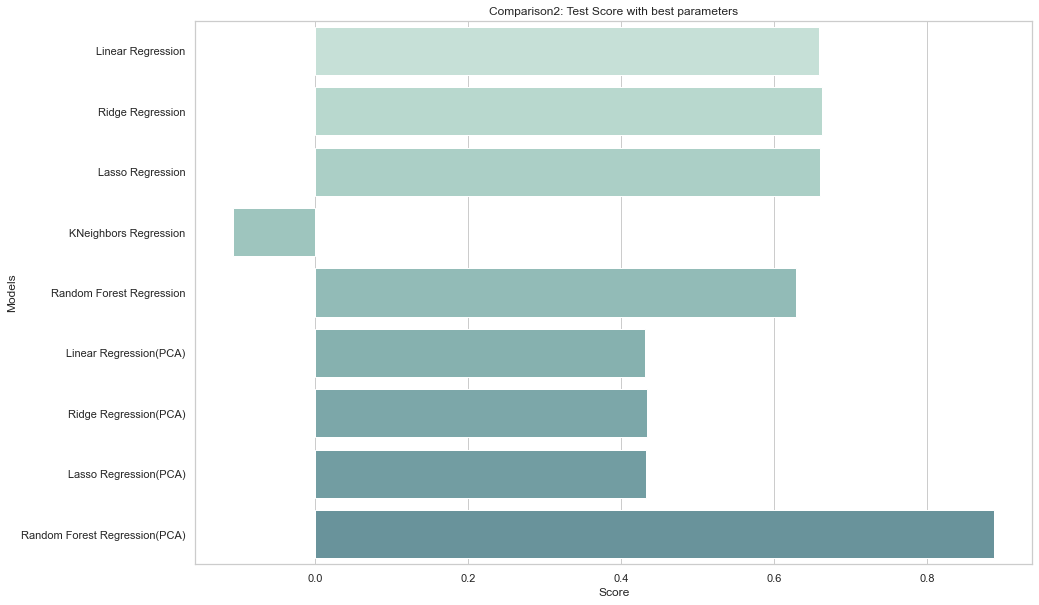

In [527]:
# Visualisation of predictions in CV with 3 fold
plt.subplots(figsize=(15, 10))
sns.barplot(x='Test Set Mean Score', y='Models', data=table2, palette = sns.cubehelix_palette(len('Test Set Mean Score'), rot=-.30))
plt.xlabel("Score")
plt.ylabel("Models")
plt.title('Comparison2: Test Score with best parameters')
plt.show()

###  Unseen Data

In [532]:
import random

Sample = retails1.sample(n = 200)
smp1 = Sample.sample(n = 100)
smp2 = Sample.drop(smp1.index)

positive_corr = ['Temperature', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown5', 'Not Holiday', 'Holiday', 'Size']
negative_corr = ['Fuel_Price', 'MarkDown4', 'CPI', 'Unemployment']

# Generate unseen data that should have higher sales than before
def unseen_data_sales_up(smp):
    for predictor in positive_corr:
        smp[predictor] = smp[predictor] + random.uniform(1, 10)
    for predictor in negative_corr:
        smp[predictor] = smp[predictor] - random.uniform(1, 10)
    return smp

# Generate unseen data that should have lower sales than before
def unseen_data_sales_down(smp):
    for predictor in positive_corr:
        smp[predictor] = smp[predictor] - random.uniform(1, 10)
    for predictor in negative_corr:
        smp[predictor] = smp[predictor] + random.uniform(1, 10)
    return smp

sample_sales_up = unseen_data_sales_up(smp1)
sample_sales_down = unseen_data_sales_down(smp2)

X_up=sample_sales_up[features].drop(['Weekly_Sales', 'Type', 'Date', 'IsHoliday', 'Week', 'Year', 'Month', 'Day', 'Store', 'Dept'],axis=1)
y_up=sample_sales_up['Weekly_Sales']

X_down=sample_sales_down[features].drop(['Weekly_Sales', 'Type', 'Date', 'IsHoliday', 'Week', 'Year', 'Month', 'Day', 'Store', 'Dept'],axis=1)
y_down=sample_sales_down['Weekly_Sales']

### Test Unseen Data Using Best Model（Random Forest Regression)

In [533]:
#start timer
startTime = perf_counter()

print("-------------------------------")
print("Random Forest Regression(Best Model): ")
print("-------------------------------")

print("Positive coefficient upward")
unseen_pred = forest2.predict(X_up)
print('MSE:', round(metrics.mean_squared_error(unseen_pred, y_up)))
print('R2 Score:', round(r2_score(y_up, unseen_pred), 4))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_up, unseen_pred)), 4))

print(" ")

print("Negative coefficient downward")
unseen_pred = forest2.predict(X_down)
print('MSE:', round(metrics.mean_squared_error(unseen_pred, y_down)))
print('R2 Score:', round(r2_score(y_down, unseen_pred), 4))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_down, unseen_pred)), 4))

-------------------------------
Random Forest Regression(Best Model): 
-------------------------------
Positive coefficient upward
MSE: 249309668
R2 Score: 0.6278
RMSE: 15789.543
 
Negative coefficient downward
MSE: 103961160
R2 Score: 0.6926
RMSE: 10196.1346


https://www.kaggle.com/aremoto/retail-sales-forecast

https://www.kaggle.com/chukexu/retail-data-analytics-lei-chuke-shizheng

https://www.kaggle.com/shubhamsinghgharsele/retail-data-analysis

https://www.kaggle.com/ashishpatel26/retails-data-analysis-using-lstm

https://www.kaggle.com/fatihkucuk/retail01 plot

https://www.kaggle.com/ladybeetle/retail-sales-eda-and-forecastaa